## Music Recommendation System (Data Processing and Analysis)

### Obtaining Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as ms
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 2000)

In [3]:
echonest = pd.read_csv('datasets/raw/fma_metadata/echonest.csv', low_memory=False)
features = pd.read_csv('datasets/raw/fma_metadata/features.csv', low_memory=False)
genres = pd.read_csv('datasets/raw/fma_metadata/genres.csv', low_memory=False)
tracks = pd.read_csv('datasets/raw/fma_metadata/tracks.csv', low_memory=False)

### Working with 'Echonest' dataset

#### Analysing Data

In [4]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Columns: 250 entries, Unnamed: 0 to echonest.248
dtypes: object(250)
memory usage: 25.0+ MB


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106577 entries, 0 to 106576
Columns: 519 entries, feature to zcr.6
dtypes: object(519)
memory usage: 422.0+ MB


In [6]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


In [7]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106576 entries, 0 to 106575
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  106575 non-null  object
 1   album       106575 non-null  object
 2   album.1     103046 non-null  object
 3   album.2     70295 non-null   object
 4   album.3     15296 non-null   object
 5   album.4     106575 non-null  object
 6   album.5     106575 non-null  object
 7   album.6     83150 non-null   object
 8   album.7     106575 non-null  object
 9   album.8     18061 non-null   object
 10  album.9     106575 non-null  object
 11  album.10    105550 non-null  object
 12  album.11    106575 non-null  object
 13  album.12    100067 non-null  object
 14  artist      22712 non-null   object
 15  artist.1    5376 non-null    object
 16  artist.2    14272 non-null   object
 17  artist.3    71157 non-null   object
 18  artist.4    106575 non-null  object
 19  artist.5    105719 non-

In [8]:
echonest.head(10)

Unnamed: 0        echonest      echonest.1      echonest.2  \
0        NaN  audio_features  audio_features  audio_features   
1        NaN    acousticness    danceability          energy   
2   track_id             NaN             NaN             NaN   
3          2    0.4166752327    0.6758939853    0.6344762684   
4          3    0.3744077685    0.5286430621    0.8174611317   
5          5    0.0435668989    0.7455658702    0.7014699916   
6         10    0.9516699648    0.6581786543    0.9245251615   
7        134    0.4522173071    0.5132380502    0.5604099311   
8        139    0.1065495253    0.2609111726    0.6070668636   
9        140    0.3763124975    0.7340790229    0.2656847734   

         echonest.3      echonest.4      echonest.5      echonest.6  \
0    audio_features  audio_features  audio_features  audio_features   
1  instrumentalness        liveness     speechiness           tempo   
2               NaN             NaN             NaN             NaN   
3      0.0106280683    0.1776465712    0.1593100648  165.9220000000   
4      0.0018511032    0.1058799438    0.4618181276  126.9570000000   
5      0.0006967990    0.3731433124    0.1245953419  100.2600000000   
6      0.9654270154    0.1154738842    0.0329852191  111.5620000000   
7      0.0194426943    0.0965666940    0.5255193792  114.2900000000   
8      0.8350869898    0.2236762711    0.0305692764  196.9610000000   
9      0.6695811237    0.0859951222    0.0390682262  107.9520000000   

       echonest.7  echonest.8         echonest.9      echonest.10  \
0  audio_features    metadata           metadata         metadata   
1         valence  album_date         album_name  artist_latitude   
2             NaN         NaN                NaN              NaN   
3    0.5766609880         NaN                NaN    32.6783000000   
4    0.2692402421         NaN                NaN    32.6783000000   
5    0.6216612236         NaN                NaN    32.6783000000   
6    0.9635898919  2008-03-11  Constant Hitmaker    39.9523000000   
7    0.8940722715         NaN                NaN    32.6783000000   
8    0.1602670903         NaN                NaN    41.8239000000   
9    0.6099912728         NaN                NaN    41.8239000000   

            echonest.11       echonest.12                        echonest.13  \
0              metadata          metadata                           metadata   
1       artist_location  artist_longitude                        artist_name   
2                   NaN               NaN                                NaN   
3           Georgia, US    -83.2230000000                               AWOL   
4           Georgia, US    -83.2230000000                               AWOL   
5           Georgia, US    -83.2230000000                               AWOL   
6  Philadelphia, PA, US    -75.1624000000                          Kurt Vile   
7           Georgia, US    -83.2230000000                               AWOL   
8    Providence, RI, US    -71.4120000000  Alec K. Redfearn and the Eyesores   
9    Providence, RI, US    -71.4120000000  Alec K. Redfearn and the Eyesores   

             echonest.14            echonest.15              echonest.16  \
0               metadata                  ranks                    ranks   
1                release  artist_discovery_rank  artist_familiarity_rank   
2                    NaN                    NaN                      NaN   
3   AWOL - A Way Of Life                    NaN                      NaN   
4   AWOL - A Way Of Life                    NaN                      NaN   
5   AWOL - A Way Of Life                    NaN                      NaN   
6      Constant Hitmaker        2635.0000000000          2544.0000000000   
7   AWOL - A Way Of Life                    NaN                      NaN   
8  Every Man For Himself      149495.0000000000        104037.0000000000   
9         The Blind Spot      149495.0000000000        104037.0000000000   

              echonest.17         ech

#### Feature Engineering

<AxesSubplot:>

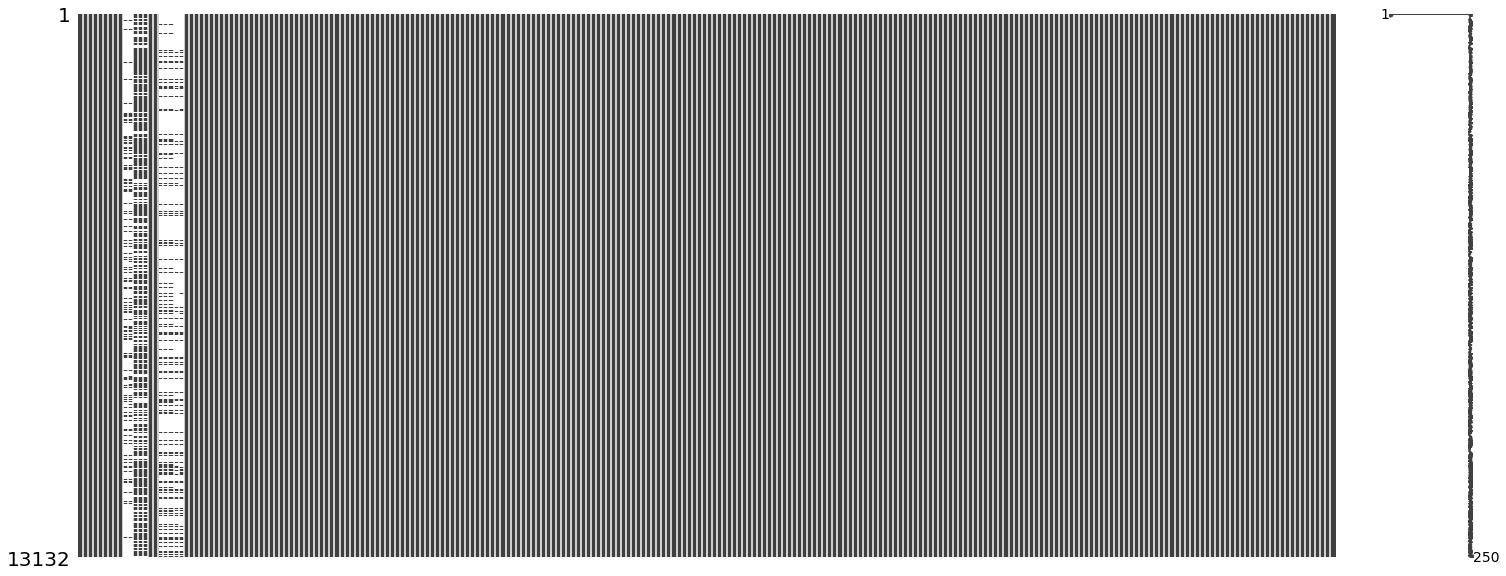

In [9]:
ms.matrix(echonest)

In [10]:
echonest.drop(['echonest.8', 'echonest.9', 'echonest.15', 'echonest.16', 'echonest.17', 'echonest.18', 'echonest.19'], axis=1, inplace=True)

In [11]:
echonest.tail(15)

Unnamed: 0      echonest    echonest.1    echonest.2    echonest.3  \
13117     124818  0.0928639968  0.6460803281  0.7719996143  0.5690691934   
13118     124819  0.2121955820  0.6917582521  0.8017361952  0.4266290835   
13119     124820  0.0595837468  0.7024350743  0.6220372699  0.0995079588   
13120     124850  0.1054873289  0.6904114436  0.5460091759  0.2663211085   
13121     124851  0.0348772113  0.6411274295  0.5940740368  0.4789058517   
13122     124852  0.7025526566  0.7288996908  0.5906363743  0.4150600442   
13123     124853  0.0203070844  0.6895748156  0.6763060612  0.8918172674   
13124     124854  0.0265449726  0.6673628324  0.6573992910  0.3641067035   
13125     124855  0.1602814198  0.6042489072  0.5542424097  0.7286964855   
13126     124856  0.1122682004  0.5812552216  0.6659629420  0.8530414856   
13127     124857  0.0075923787  0.7903638889  0.7192884920  0.8531136104   
13128     124862  0.0414978751  0.8430772752  0.5364960502  0.8651509406   
13129     124863  0.0001243554  0.6096863074  0.8951355148  0.8466237167   
13130     124864  0.3275763188  0.5744261153  0.5483269749  0.4528673446   
13131     124911  0.9936062072  0.4993390665  0.0506220541  0.9456766573   

         echonest.4    echonest.5      echonest.6    echonest.7  \
13117  0.4429606389  0.1095207339  174.0590000000  0.7107030731   
13118  0.2314038128  0.0584528097  119.9850000000  0.4189600715   
13119  0.2363699961  0.0588595165   96.0060000000  0.2317955628   
13120  0.2054930069  0.0316428161   93.0160000000  0.4074808124   
13121  0.3990607778  0.0414731943   96.0070000000  0.6431204198   
13122  0.1184253372  0.0373890775  100.0000000000  0.1984658907   
13123  0.0959150926  0.0309679966  120.0230000000  0.4382009644   
13124  0.1080308892  0.0428318751  121.0040000000  0.4605447949   
13125  0.3512486205  0.1753881743  167.9750000000  0.4020434586   
13126  0.1009662312  0.0416470545  121.0100000000  0.3879175367   
13127  0.7207151117  0.0825495166  141.3320000000  0.8904605635   
13128  0.5479494580  0.0740006014  101.9750000000  0.4768454042   
13129  0.6329030323  0.0515172197  129.9960000000  0.4966672492   
13130  0.0759278512  0.0333884412  142.0090000000  0.5692743039   
13131  0.0959653835  0.0651891051  119.9650000000  0.2046522687   

         echonest.10                              echonest.11     echonest.12  \
13117  52.1082000000                              Netherlands    5.3298600000   
13118            NaN                                      NaN             NaN   
13119            NaN                                      NaN             NaN   
13120  52.1082000000                              Netherlands    5.3298600000   
13121  52.1082000000                              Netherlands    5.3298600000   
13122  52.1082000000                              Netherlands    5.3298600000   
13123  52.1082000000                              Netherlands    5.3298600000   
13124  52.1082000000                              Netherlands    5.3298600000   
13125  52.1082000000                              Netherlands    5.3298600000   
13126  52.1082000000                              Netherlands    5.3298600000   
13127  52.1082000000                              Netherlands    5.3298600000   
13128  52.1082000000                              Netherlands    5.3298600000   
13129  52.1082000000                              Netherlands    5.3298600000   
13130  52.1082000000                              Netherlands    5.3298600000   
13131  35.7497000000  Higashiyamato-shi, Tokyo Prefecture, JP  139.4220000000   

           echonest.13           echonest.14   echonest.20   echonest.21  \
13117            Basic       HUmanworkshop 1  0.4308083945  0.4568710000   
13118        Leisure-B       HUmanworkshop 1  0.3094238866  0.2083420000   
13119        Leisure-B       HUmanworkshop 1  0.3094238866  0.2083420000   
13120            Basic  Do You Know The Word  0.4308083945  0.4568710000   
13121            Basic  Do You Know The

<AxesSubplot:>

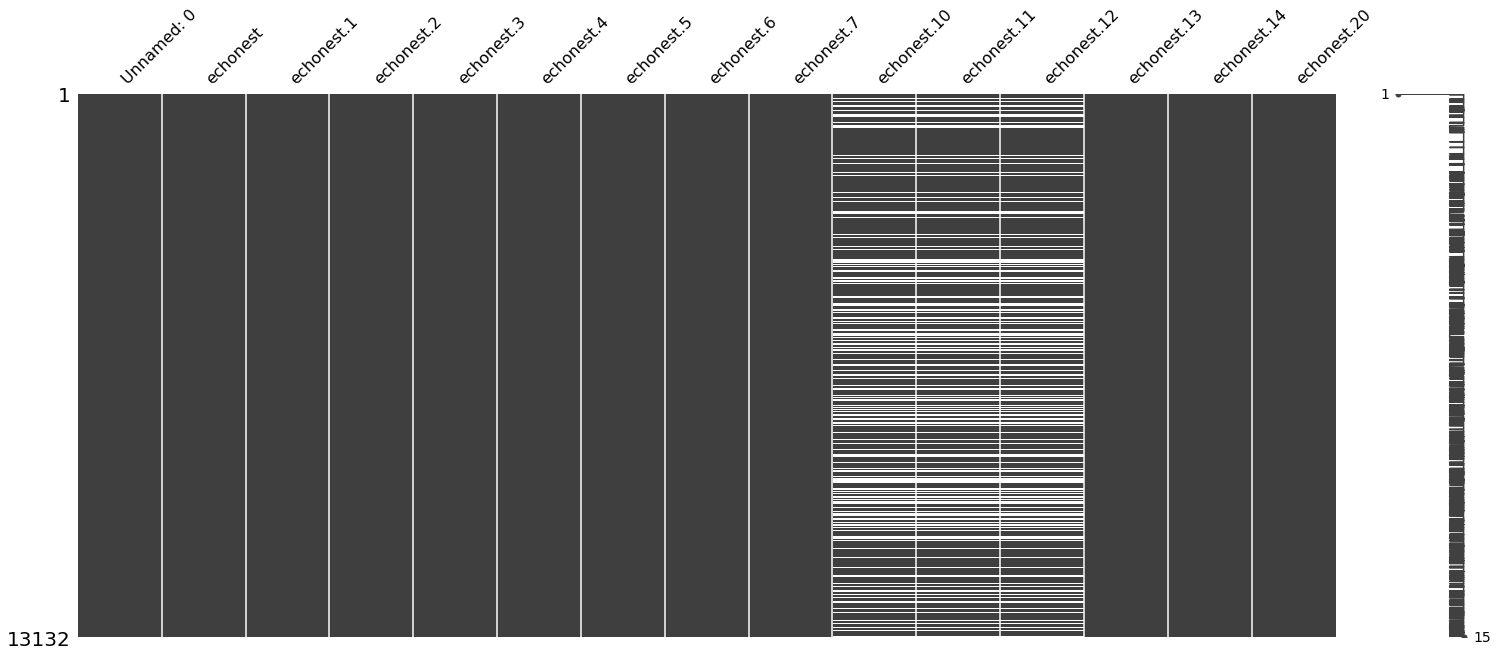

In [12]:
ms.matrix(echonest.iloc[:, 0:15])

In [13]:
echonest.drop(['echonest.10', 'echonest.11', 'echonest.12'], axis=1, inplace=True)

<AxesSubplot:>

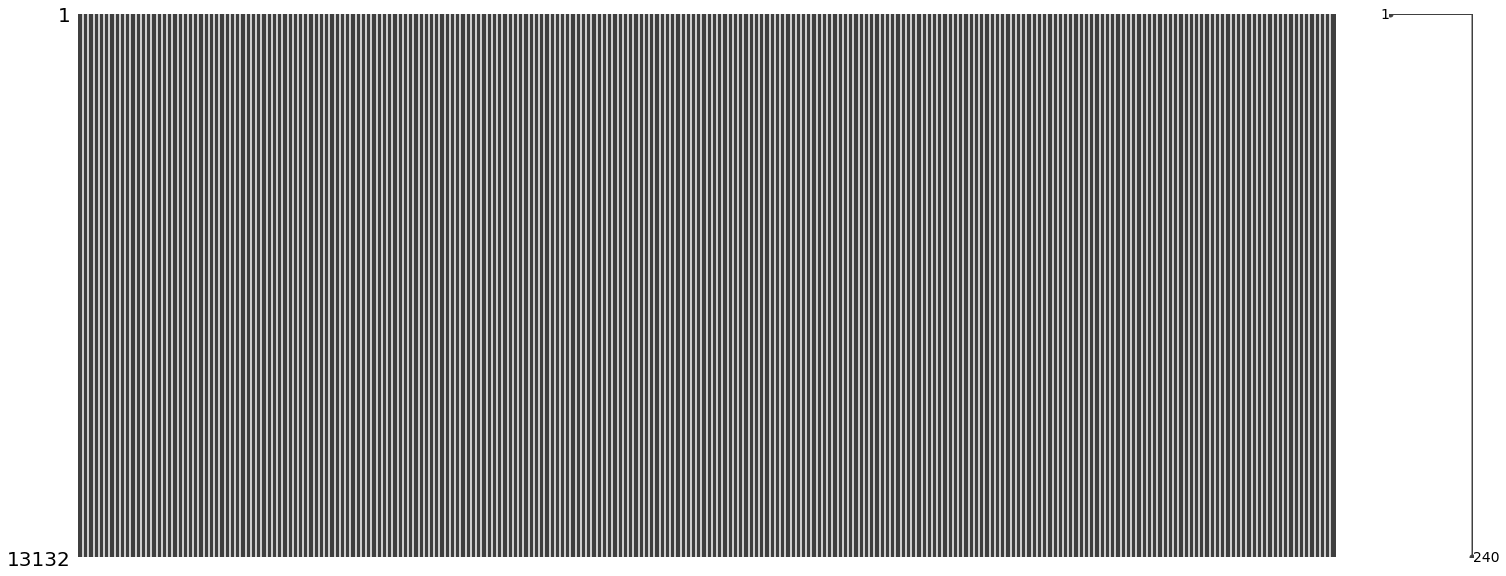

In [14]:
ms.matrix(echonest)

In [15]:
echonest.head(10)

Unnamed: 0        echonest      echonest.1      echonest.2  \
0        NaN  audio_features  audio_features  audio_features   
1        NaN    acousticness    danceability          energy   
2   track_id             NaN             NaN             NaN   
3          2    0.4166752327    0.6758939853    0.6344762684   
4          3    0.3744077685    0.5286430621    0.8174611317   
5          5    0.0435668989    0.7455658702    0.7014699916   
6         10    0.9516699648    0.6581786543    0.9245251615   
7        134    0.4522173071    0.5132380502    0.5604099311   
8        139    0.1065495253    0.2609111726    0.6070668636   
9        140    0.3763124975    0.7340790229    0.2656847734   

         echonest.3      echonest.4      echonest.5      echonest.6  \
0    audio_features  audio_features  audio_features  audio_features   
1  instrumentalness        liveness     speechiness           tempo   
2               NaN             NaN             NaN             NaN   
3      0.0106280683    0.1776465712    0.1593100648  165.9220000000   
4      0.0018511032    0.1058799438    0.4618181276  126.9570000000   
5      0.0006967990    0.3731433124    0.1245953419  100.2600000000   
6      0.9654270154    0.1154738842    0.0329852191  111.5620000000   
7      0.0194426943    0.0965666940    0.5255193792  114.2900000000   
8      0.8350869898    0.2236762711    0.0305692764  196.9610000000   
9      0.6695811237    0.0859951222    0.0390682262  107.9520000000   

       echonest.7                        echonest.13            echonest.14  \
0  audio_features                           metadata               metadata   
1         valence                        artist_name                release   
2             NaN                                NaN                    NaN   
3    0.5766609880                               AWOL   AWOL - A Way Of Life   
4    0.2692402421                               AWOL   AWOL - A Way Of Life   
5    0.6216612236                               AWOL   AWOL - A Way Of Life   
6    0.9635898919                          Kurt Vile      Constant Hitmaker   
7    0.8940722715                               AWOL   AWOL - A Way Of Life   
8    0.1602670903  Alec K. Redfearn and the Eyesores  Every Man For Himself   
9    0.6099912728  Alec K. Redfearn and the Eyesores         The Blind Spot   

        echonest.20         echonest.21        echonest.22      echonest.23  \
0   social_features     social_features    social_features  social_features   
1  artist_discovery  artist_familiarity  artist_hotttnesss    song_currency   
2               NaN                 NaN                NaN              NaN   
3      0.3889898648        0.3867400000       0.4063700000     0.0000000000   
4      0.3889898648        0.3867400000       0.4063700000     0.0000000000   
5      0.3889898648        0.3867400000       0.4063700000     0.0000000000   
6      0.5573390067        0.6142720000       0.7983870000     0.0051579926   
7      0.3889898648        0.3867400000       0.4063700000     0.0000000000   
8      0.3889228586        0.3307840000       0.4063000000     0.0002500000   
9      0.3889228586        0.3307840000       0.4063000000     0.0000000000   

       echonest.24        echonest.25        echonest.26        echonest.27  \
0  social_features  temporal_features  temporal_features  temporal_features   
1  song_hotttnesss                000                001                002   
2              NaN                NaN                NaN                NaN   
3     0.0000000000       0.8772332668       0.5889111161       0.3542430103   
4     0.0000000000       0.5344291329       0.5374142528       0.4432994723   
5     0.0000000000       0.5480925441       0.7201917768       0.3892570734   
6     0.3545160000       0.3114041686       0.7114023566       0.3219138086   
7     0.0000000000       0.6108492613       0.5691694617       0.4284938276   
8     0.0385500000       0.8002824187       0.5863723159       0

In [16]:
echonest.drop(0, axis=0, inplace=True)

In [17]:
echonest.head(10)

Unnamed: 0      echonest    echonest.1    echonest.2        echonest.3  \
1         NaN  acousticness  danceability        energy  instrumentalness   
2    track_id           NaN           NaN           NaN               NaN   
3           2  0.4166752327  0.6758939853  0.6344762684      0.0106280683   
4           3  0.3744077685  0.5286430621  0.8174611317      0.0018511032   
5           5  0.0435668989  0.7455658702  0.7014699916      0.0006967990   
6          10  0.9516699648  0.6581786543  0.9245251615      0.9654270154   
7         134  0.4522173071  0.5132380502  0.5604099311      0.0194426943   
8         139  0.1065495253  0.2609111726  0.6070668636      0.8350869898   
9         140  0.3763124975  0.7340790229  0.2656847734      0.6695811237   
10        141  0.9636568796  0.4359329980  0.0756321472      0.3454934909   

      echonest.4    echonest.5      echonest.6    echonest.7  \
1       liveness   speechiness           tempo       valence   
2            NaN           NaN             NaN           NaN   
3   0.1776465712  0.1593100648  165.9220000000  0.5766609880   
4   0.1058799438  0.4618181276  126.9570000000  0.2692402421   
5   0.3731433124  0.1245953419  100.2600000000  0.6216612236   
6   0.1154738842  0.0329852191  111.5620000000  0.9635898919   
7   0.0965666940  0.5255193792  114.2900000000  0.8940722715   
8   0.2236762711  0.0305692764  196.9610000000  0.1602670903   
9   0.0859951222  0.0390682262  107.9520000000  0.6099912728   
10  0.1056858694  0.0266578493   33.4770000000  0.1639499337   

                          echonest.13            echonest.14  \
1                         artist_name                release   
2                                 NaN                    NaN   
3                                AWOL   AWOL - A Way Of Life   
4                                AWOL   AWOL - A Way Of Life   
5                                AWOL   AWOL - A Way Of Life   
6                           Kurt Vile      Constant Hitmaker   
7                                AWOL   AWOL - A Way Of Life   
8   Alec K. Redfearn and the Eyesores  Every Man For Himself   
9   Alec K. Redfearn and the Eyesores         The Blind Spot   
10  Alec K. Redfearn and the Eyesores  Every Man For Himself   

         echonest.20         echonest.21        echonest.22    echonest.23  \
1   artist_discovery  artist_familiarity  artist_hotttnesss  song_currency   
2                NaN                 NaN                NaN            NaN   
3       0.3889898648        0.3867400000       0.4063700000   0.0000000000   
4       0.3889898648        0.3867400000       0.4063700000   0.0000000000   
5       0.3889898648        0.3867400000       0.4063700000   0.0000000000   
6       0.5573390067        0.6142720000       0.7983870000   0.0051579926   
7       0.3889898648        0.3867400000       0.4063700000   0.0000000000   
8       0.3889228586        0.3307840000       0.4063000000   0.0002500000   
9       0.3889228586        0.3307840000       0.4063000000   0.0000000000   
10      0.3889228586        0.3307840000       0.4063000000   0.0001666667   

        echonest.24   echonest.25   echonest.26   echonest.27   echonest.28  \
1   song_hotttnesss           000           001           002           003   
2               NaN           NaN           NaN           NaN           NaN   
3      0.0000000000  0.8772332668  0.5889111161  0.3542430103  0.2950901389   
4      0.0000000000  0.5344291329  0.5374142528  0.4432994723  0.3908788860   
5      0.0000000000  0.5480925441  0.7201917768  0.3892570734  0.3449338675   
6      0.3545160000  0.3114041686  0.7114023566  0.3219138086  0.5006007552   
7      0.0000000000  0.6108492613  0.5691694617  0.4284938276  0.3457958102   
8      0.0385500000  0.8002824187  0.5863723159  0.3541595340  0.2662401199   
9      0.0000000000  0.3318110406  0.3127331734  0.4654018283  0.2482361048   
10     0.0385500000  0.2554939985  0.1852183044  0.2444293499  0.2658489943   

     echonest.29

In [18]:
echonest.reset_index(inplace=True)

In [19]:
echonest.drop('index', inplace=True, axis=1)
echonest.head(10)

Unnamed: 0      echonest    echonest.1    echonest.2        echonest.3  \
0        NaN  acousticness  danceability        energy  instrumentalness   
1   track_id           NaN           NaN           NaN               NaN   
2          2  0.4166752327  0.6758939853  0.6344762684      0.0106280683   
3          3  0.3744077685  0.5286430621  0.8174611317      0.0018511032   
4          5  0.0435668989  0.7455658702  0.7014699916      0.0006967990   
5         10  0.9516699648  0.6581786543  0.9245251615      0.9654270154   
6        134  0.4522173071  0.5132380502  0.5604099311      0.0194426943   
7        139  0.1065495253  0.2609111726  0.6070668636      0.8350869898   
8        140  0.3763124975  0.7340790229  0.2656847734      0.6695811237   
9        141  0.9636568796  0.4359329980  0.0756321472      0.3454934909   

     echonest.4    echonest.5      echonest.6    echonest.7  \
0      liveness   speechiness           tempo       valence   
1           NaN           NaN             NaN           NaN   
2  0.1776465712  0.1593100648  165.9220000000  0.5766609880   
3  0.1058799438  0.4618181276  126.9570000000  0.2692402421   
4  0.3731433124  0.1245953419  100.2600000000  0.6216612236   
5  0.1154738842  0.0329852191  111.5620000000  0.9635898919   
6  0.0965666940  0.5255193792  114.2900000000  0.8940722715   
7  0.2236762711  0.0305692764  196.9610000000  0.1602670903   
8  0.0859951222  0.0390682262  107.9520000000  0.6099912728   
9  0.1056858694  0.0266578493   33.4770000000  0.1639499337   

                         echonest.13            echonest.14       echonest.20  \
0                        artist_name                release  artist_discovery   
1                                NaN                    NaN               NaN   
2                               AWOL   AWOL - A Way Of Life      0.3889898648   
3                               AWOL   AWOL - A Way Of Life      0.3889898648   
4                               AWOL   AWOL - A Way Of Life      0.3889898648   
5                          Kurt Vile      Constant Hitmaker      0.5573390067   
6                               AWOL   AWOL - A Way Of Life      0.3889898648   
7  Alec K. Redfearn and the Eyesores  Every Man For Himself      0.3889228586   
8  Alec K. Redfearn and the Eyesores         The Blind Spot      0.3889228586   
9  Alec K. Redfearn and the Eyesores  Every Man For Himself      0.3889228586   

          echonest.21        echonest.22    echonest.23      echonest.24  \
0  artist_familiarity  artist_hotttnesss  song_currency  song_hotttnesss   
1                 NaN                NaN            NaN              NaN   
2        0.3867400000       0.4063700000   0.0000000000     0.0000000000   
3        0.3867400000       0.4063700000   0.0000000000     0.0000000000   
4        0.3867400000       0.4063700000   0.0000000000     0.0000000000   
5        0.6142720000       0.7983870000   0.0051579926     0.3545160000   
6        0.3867400000       0.4063700000   0.0000000000     0.0000000000   
7        0.3307840000       0.4063000000   0.0002500000     0.0385500000   
8        0.3307840000       0.4063000000   0.0000000000     0.0000000000   
9        0.3307840000       0.4063000000   0.0001666667     0.0385500000   

    echonest.25   echonest.26   echonest.27   echonest.28   echonest.29  \
0           000           001           002           003           004   
1           NaN           NaN           NaN           NaN           NaN   
2  0.8772332668  0.5889111161  0.3542430103  0.2950901389  0.2984125018   
3  0.5344291329  0.5374142528  0.4432994723  0.3908788860  0.3445729315   
4  0.5480925441  0.7201917768  0.3892570734  0.3449338675  0.3612995744   
5  0.3114041686  0.7114023566  0.3219138086  0.5006007552  0.2509630620   
6  0.6108492613  0.5691694617  0.4284938276  0.3457958102  0.3769202232   
7  0.8002824187  0.5863723159  0.3541595340  0.2662401199  0.2501960099   
8  0.3318110406  0.3127331734  0.4654018283  0.2482361048  0.354816

In [20]:
echonest.iloc[0, 0]

nan

In [21]:
echonest.iloc[1, 0]

'track_id'

In [22]:
echonest.iloc[0, 0] = echonest.iloc[1, 0]

In [23]:
echonest.head()

Unnamed: 0      echonest    echonest.1    echonest.2        echonest.3  \
0   track_id  acousticness  danceability        energy  instrumentalness   
1   track_id           NaN           NaN           NaN               NaN   
2          2  0.4166752327  0.6758939853  0.6344762684      0.0106280683   
3          3  0.3744077685  0.5286430621  0.8174611317      0.0018511032   
4          5  0.0435668989  0.7455658702  0.7014699916      0.0006967990   

     echonest.4    echonest.5      echonest.6    echonest.7  echonest.13  \
0      liveness   speechiness           tempo       valence  artist_name   
1           NaN           NaN             NaN           NaN          NaN   
2  0.1776465712  0.1593100648  165.9220000000  0.5766609880         AWOL   
3  0.1058799438  0.4618181276  126.9570000000  0.2692402421         AWOL   
4  0.3731433124  0.1245953419  100.2600000000  0.6216612236         AWOL   

            echonest.14       echonest.20         echonest.21  \
0               release  artist_discovery  artist_familiarity   
1                   NaN               NaN                 NaN   
2  AWOL - A Way Of Life      0.3889898648        0.3867400000   
3  AWOL - A Way Of Life      0.3889898648        0.3867400000   
4  AWOL - A Way Of Life      0.3889898648        0.3867400000   

         echonest.22    echonest.23      echonest.24   echonest.25  \
0  artist_hotttnesss  song_currency  song_hotttnesss           000   
1                NaN            NaN              NaN           NaN   
2       0.4063700000   0.0000000000     0.0000000000  0.8772332668   
3       0.4063700000   0.0000000000     0.0000000000  0.5344291329   
4       0.4063700000   0.0000000000     0.0000000000  0.5480925441   

    echonest.26   echonest.27   echonest.28   echonest.29   echonest.30  \
0           001           002           003           004           005   
1           NaN           NaN           NaN           NaN           NaN   
2  0.5889111161  0.3542430103  0.2950901389  0.2984125018  0.3094303906   
3  0.5374142528  0.4432994723  0.3908788860  0.3445729315  0.3664476275   
4  0.7201917768  0.3892570734  0.3449338675  0.3612995744  0.4025429785   

    echonest.31   echonest.32   echonest.33   echonest.34   echonest.35  \
0           006           007           008           009           010   
1           NaN           NaN           NaN           NaN           NaN   
2  0.3044959009  0.3345789909  0.2494945079  0.2596555948  0.3183763623   
3  0.4194553494  0.7477657795  0.4609008729  0.3923788667  0.4745588005   
4  0.4340436757  0.3881373107  0.5124866962  0.5257551670  0.4253708720   

    echonest.36   echonest.37   echonest.38   echonest.39   echonest.40  \
0           011           012           013           014           015   
1           NaN           NaN           NaN           NaN           NaN   
2  0.3719735742  1.0000000000  0.5709999800  0.2779999971  0.2099999934   
3  0.4067287743  0.5059999824  0.5145000219  0.3869999945  0.3235000074   
4  0.4468963742  0.5109999776  0.7720000148  0.3610000014  0.2879999876   

    echonest.41   echonest.42   echonest.43   echonest.44   echonest.45  \
0           016           017           018           019           020   
1           NaN           NaN           NaN           NaN           NaN   
2  0.2150000036  0.2285000086  0.2375000119  0.2790000141  0.1685000062   
3  0.2804999948  0.3134999871  0.3454999924  0.8980000019  0.4365000129   
4  0.3310000002  0.3720000088  0.3589999974  0.2790000141  0.4429999888   

    echonest.46   echonest.47   echonest.48   echonest.49   echonest.50  \
0           021           022           023           024           025   
1           NaN           NaN           NaN           NaN           NaN   
2  0.1685000062  0.2790000141  0.3324999809  0.0498478077  0.1042116806   
3  0.3384999931  0.3980000019  0.3479999900  0.0792073756  0.0833189711   
4  0.4839999974  0.3680000007  0.3970000148  0.0810512751  0.0783000439   

    echonest.51   ech

In [24]:
echonest.drop(1, axis=0, inplace=True)

In [25]:
echonest.columns = echonest.iloc[0]

In [26]:
echonest.head()

0  track_id  acousticness  danceability        energy  instrumentalness  \
0  track_id  acousticness  danceability        energy  instrumentalness   
2         2  0.4166752327  0.6758939853  0.6344762684      0.0106280683   
3         3  0.3744077685  0.5286430621  0.8174611317      0.0018511032   
4         5  0.0435668989  0.7455658702  0.7014699916      0.0006967990   
5        10  0.9516699648  0.6581786543  0.9245251615      0.9654270154   

0      liveness   speechiness           tempo       valence  artist_name  \
0      liveness   speechiness           tempo       valence  artist_name   
2  0.1776465712  0.1593100648  165.9220000000  0.5766609880         AWOL   
3  0.1058799438  0.4618181276  126.9570000000  0.2692402421         AWOL   
4  0.3731433124  0.1245953419  100.2600000000  0.6216612236         AWOL   
5  0.1154738842  0.0329852191  111.5620000000  0.9635898919    Kurt Vile   

0               release  artist_discovery  artist_familiarity  \
0               release  artist_discovery  artist_familiarity   
2  AWOL - A Way Of Life      0.3889898648        0.3867400000   
3  AWOL - A Way Of Life      0.3889898648        0.3867400000   
4  AWOL - A Way Of Life      0.3889898648        0.3867400000   
5     Constant Hitmaker      0.5573390067        0.6142720000   

0  artist_hotttnesss  song_currency  song_hotttnesss           000  \
0  artist_hotttnesss  song_currency  song_hotttnesss           000   
2       0.4063700000   0.0000000000     0.0000000000  0.8772332668   
3       0.4063700000   0.0000000000     0.0000000000  0.5344291329   
4       0.4063700000   0.0000000000     0.0000000000  0.5480925441   
5       0.7983870000   0.0051579926     0.3545160000  0.3114041686   

0           001           002           003           004           005  \
0           001           002           003           004           005   
2  0.5889111161  0.3542430103  0.2950901389  0.2984125018  0.3094303906   
3  0.5374142528  0.4432994723  0.3908788860  0.3445729315  0.3664476275   
4  0.7201917768  0.3892570734  0.3449338675  0.3612995744  0.4025429785   
5  0.7114023566  0.3219138086  0.5006007552  0.2509630620  0.3213164508   

0           006           007           008           009           010  \
0           006           007           008           009           010   
2  0.3044959009  0.3345789909  0.2494945079  0.2596555948  0.3183763623   
3  0.4194553494  0.7477657795  0.4609008729  0.3923788667  0.4745588005   
4  0.4340436757  0.3881373107  0.5124866962  0.5257551670  0.4253708720   
5  0.7342495322  0.3251882195  0.3730122745  0.2358400822  0.3687555194   

0           011           012           013           014           015  \
0           011           012           013           014           015   
2  0.3719735742  1.0000000000  0.5709999800  0.2779999971  0.2099999934   
3  0.4067287743  0.5059999824  0.5145000219  0.3869999945  0.3235000074   
4  0.4468963742  0.5109999776  0.7720000148  0.3610000014  0.2879999876   
5  0.4407747984  0.2630000114  0.7360000014  0.2730000019  0.4259999990   

0           016           017           018           019           020  \
0           016           017           018           019           020   
2  0.2150000036  0.2285000086  0.2375000119  0.2790000141  0.1685000062   
3  0.2804999948  0.3134999871  0.3454999924  0.8980000019  0.4365000129   
4  0.3310000002  0.3720000088  0.3589999974  0.2790000141  0.4429999888   
5  0.2140000015  0.2879999876  0.8100000024  0.2460000068  0.2949999869   

0           021           022           023           024           025  \
0           021           022           023           024           025   
2  0.1685000062  0.2790000141  0.3324999809  0.0498478077  0.1042116806   
3  0.3384999931  0.3980000019  0.3479999900  0.0792073756  0.0833189711   
4  0.4839999974  0.3680000007  0.3970000148  0.0810512751  0.0783000439   
5  0.1640000045  0.3109999895  0.3860000074  0.0339685380  0.0706918016   

0           026          

In [27]:
echonest.drop(0, axis=0, inplace=True)

In [28]:
echonest.reset_index(inplace=True)

In [29]:
echonest.drop('index', inplace=True, axis=1)

In [30]:
echonest.head()

0 track_id  acousticness  danceability        energy instrumentalness  \
0        2  0.4166752327  0.6758939853  0.6344762684     0.0106280683   
1        3  0.3744077685  0.5286430621  0.8174611317     0.0018511032   
2        5  0.0435668989  0.7455658702  0.7014699916     0.0006967990   
3       10  0.9516699648  0.6581786543  0.9245251615     0.9654270154   
4      134  0.4522173071  0.5132380502  0.5604099311     0.0194426943   

0      liveness   speechiness           tempo       valence artist_name  \
0  0.1776465712  0.1593100648  165.9220000000  0.5766609880        AWOL   
1  0.1058799438  0.4618181276  126.9570000000  0.2692402421        AWOL   
2  0.3731433124  0.1245953419  100.2600000000  0.6216612236        AWOL   
3  0.1154738842  0.0329852191  111.5620000000  0.9635898919   Kurt Vile   
4  0.0965666940  0.5255193792  114.2900000000  0.8940722715        AWOL   

0               release artist_discovery artist_familiarity artist_hotttnesss  \
0  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   
1  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   
2  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   
3     Constant Hitmaker     0.5573390067       0.6142720000      0.7983870000   
4  AWOL - A Way Of Life     0.3889898648       0.3867400000      0.4063700000   

0 song_currency song_hotttnesss           000           001           002  \
0  0.0000000000    0.0000000000  0.8772332668  0.5889111161  0.3542430103   
1  0.0000000000    0.0000000000  0.5344291329  0.5374142528  0.4432994723   
2  0.0000000000    0.0000000000  0.5480925441  0.7201917768  0.3892570734   
3  0.0051579926    0.3545160000  0.3114041686  0.7114023566  0.3219138086   
4  0.0000000000    0.0000000000  0.6108492613  0.5691694617  0.4284938276   

0           003           004           005           006           007  \
0  0.2950901389  0.2984125018  0.3094303906  0.3044959009  0.3345789909   
1  0.3908788860  0.3445729315  0.3664476275  0.4194553494  0.7477657795   
2  0.3449338675  0.3612995744  0.4025429785  0.4340436757  0.3881373107   
3  0.5006007552  0.2509630620  0.3213164508  0.7342495322  0.3251882195   
4  0.3457958102  0.3769202232  0.4605903029  0.4013709426  0.4499002397   

0           008           009           010           011           012  \
0  0.2494945079  0.2596555948  0.3183763623  0.3719735742  1.0000000000   
1  0.4609008729  0.3923788667  0.4745588005  0.4067287743  0.5059999824   
2  0.5124866962  0.5257551670  0.4253708720  0.4468963742  0.5109999776   
3  0.3730122745  0.2358400822  0.3687555194  0.4407747984  0.2630000114   
4  0.4289464653  0.4467355907  0.4798492193  0.3782213628  0.6140000224   

0           013           014           015           016           017  \
0  0.5709999800  0.2779999971  0.2099999934  0.2150000036  0.2285000086   
1  0.5145000219  0.3869999945  0.3235000074  0.2804999948  0.3134999871   
2  0.7720000148  0.3610000014  0.2879999876  0.3310000002  0.3720000088   
3  0.7360000014  0.2730000019  0.4259999990  0.2140000015  0.2879999876   
4  0.5450000167  0.3630000055  0.2800000012  0.3109999895  0.3970000148   

0           018           019           020           021           022  \
0  0.2375000119  0.2790000141  0.1685000062  0.1685000062  0.2790000141   
1  0.3454999924  0.8980000019  0.4365000129  0.3384999931  0.3980000019   
2  0.3589999974  0.2790000141  0.4429999888  0.4839999974  0.3680000007   
3  0.8100000024  0.2460000068  0.2949999869  0.1640000045  0.3109999895   
4  0.3170000017  0.4040000141  0.3560000062  0.3799999952  0.4199999869   

0           023           024           025           026           027  \
0  0.3324999809  0.0498478077  0.1042116806  0.0602296367  0.0522896349   
1  0.3479999900  0.0792073756  0.0833189711  0.0735951439  0.0710243136   
2  0.3970000148  0.0810512751  0.0783000439  0.0486967675  0.0569216162   
3  0.3860000074  0.0339685380  0.0706918016  0.039161499

In [31]:
type(echonest['acousticness'][0])

str

In [32]:
def convert_to_float(df, columns):
    for i in columns:
        df[i] = df[i].astype('float')
    return df

In [33]:
echonest = convert_to_float(echonest, set(echonest.columns) - set(['track_id', 'artist_name', 'release']))

In [34]:
echonest.head()

0 track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0        2      0.416675      0.675894  0.634476          0.010628  0.177647   
1        3      0.374408      0.528643  0.817461          0.001851  0.105880   
2        5      0.043567      0.745566  0.701470          0.000697  0.373143   
3       10      0.951670      0.658179  0.924525          0.965427  0.115474   
4      134      0.452217      0.513238  0.560410          0.019443  0.096567   

0  speechiness    tempo   valence artist_name               release  \
0     0.159310  165.922  0.576661        AWOL  AWOL - A Way Of Life   
1     0.461818  126.957  0.269240        AWOL  AWOL - A Way Of Life   
2     0.124595  100.260  0.621661        AWOL  AWOL - A Way Of Life   
3     0.032985  111.562  0.963590   Kurt Vile     Constant Hitmaker   
4     0.525519  114.290  0.894072        AWOL  AWOL - A Way Of Life   

0  artist_discovery  artist_familiarity  artist_hotttnesss  song_currency  \
0          0.388990            0.386740           0.406370       0.000000   
1          0.388990            0.386740           0.406370       0.000000   
2          0.388990            0.386740           0.406370       0.000000   
3          0.557339            0.614272           0.798387       0.005158   
4          0.388990            0.386740           0.406370       0.000000   

0  song_hotttnesss       000       001       002       003       004  \
0         0.000000  0.877233  0.588911  0.354243  0.295090  0.298413   
1         0.000000  0.534429  0.537414  0.443299  0.390879  0.344573   
2         0.000000  0.548093  0.720192  0.389257  0.344934  0.361300   
3         0.354516  0.311404  0.711402  0.321914  0.500601  0.250963   
4         0.000000  0.610849  0.569169  0.428494  0.345796  0.376920   

0       005       006       007       008       009       010       011  \
0  0.309430  0.304496  0.334579  0.249495  0.259656  0.318376  0.371974   
1  0.366448  0.419455  0.747766  0.460901  0.392379  0.474559  0.406729   
2  0.402543  0.434044  0.388137  0.512487  0.525755  0.425371  0.446896   
3  0.321316  0.734250  0.325188  0.373012  0.235840  0.368756  0.440775   
4  0.460590  0.401371  0.449900  0.428946  0.446736  0.479849  0.378221   

0    012     013    014     015     016     017     018    019     020  \
0  1.000  0.5710  0.278  0.2100  0.2150  0.2285  0.2375  0.279  0.1685   
1  0.506  0.5145  0.387  0.3235  0.2805  0.3135  0.3455  0.898  0.4365   
2  0.511  0.7720  0.361  0.2880  0.3310  0.3720  0.3590  0.279  0.4430   
3  0.263  0.7360  0.273  0.4260  0.2140  0.2880  0.8100  0.246  0.2950   
4  0.614  0.5450  0.363  0.2800  0.3110  0.3970  0.3170  0.404  0.3560   

0     021    022     023       024       025       026       027       028  \
0  0.1685  0.279  0.3325  0.049848  0.104212  0.060230  0.052290  0.047403   
1  0.3385  0.398  0.3480  0.079207  0.083319  0.073595  0.071024  0.056679   
2  0.4840  0.368  0.3970  0.081051  0.078300  0.048697  0.056922  0.045264   
3  0.1640  0.311  0.3860  0.033969  0.070692  0.039161  0.095781  0.024102   
4  0.3800  0.420  0.2920  0.085176  0.092242  0.073183  0.056354  0.062012   

0       029       030       031       032       033       034       035  \
0  0.052815  0.052733  0.062216  0.051613  0.057399  0.053199  0.062583   
1  0.066113  0.073889  0.088100  0.071305  0.059275  0.088222  0.067298   
2  0.066819  0.094489  0.089250  0.098089  0.084133  0.068866  0.086224   
3  0.028497  0.073847  0.045103  0.065468  0.041634  0.041619  0.084442   
4  0.088343  0.077084  0.097942  0.101790  0.094533  0.089367  0.088544   

0    036    037    038    039    040    041    042    043    044    045  \
0  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041  0.010  0.009   
1  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053  0.022  0.032   
2  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022  0.040  0.026   
3  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038  0.022  0.009   
4  0.

In [35]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 240 entries, track_id to 223
dtypes: float64(237), object(3)
memory usage: 24.0+ MB


In [36]:
backup_echonest = echonest

In [37]:
echonest

0     track_id  acousticness  danceability    energy  instrumentalness  \
0            2      0.416675      0.675894  0.634476          0.010628   
1            3      0.374408      0.528643  0.817461          0.001851   
2            5      0.043567      0.745566  0.701470          0.000697   
3           10      0.951670      0.658179  0.924525          0.965427   
4          134      0.452217      0.513238  0.560410          0.019443   
...        ...           ...           ...       ...               ...   
13124   124857      0.007592      0.790364  0.719288          0.853114   
13125   124862      0.041498      0.843077  0.536496          0.865151   
13126   124863      0.000124      0.609686  0.895136          0.846624   
13127   124864      0.327576      0.574426  0.548327          0.452867   
13128   124911      0.993606      0.499339  0.050622          0.945677   

0      liveness  speechiness    tempo   valence      artist_name  \
0      0.177647     0.159310  165.922  0.576661             AWOL   
1      0.105880     0.461818  126.957  0.269240             AWOL   
2      0.373143     0.124595  100.260  0.621661             AWOL   
3      0.115474     0.032985  111.562  0.963590        Kurt Vile   
4      0.096567     0.525519  114.290  0.894072             AWOL   
...         ...          ...      ...       ...              ...   
13124  0.720715     0.082550  141.332  0.890461            Basic   
13125  0.547949     0.074001  101.975  0.476845            Basic   
13126  0.632903     0.051517  129.996  0.496667            Basic   
13127  0.075928     0.033388  142.009  0.569274            Basic   
13128  0.095965     0.065189  119.965  0.204652  Yusuke Tsutsumi   

0                   release  artist_discovery  artist_familiarity  \
0      AWOL - A Way Of Life          0.388990            0.386740   
1      AWOL - A Way Of Life          0.388990            0.386740   
2      AWOL - A Way Of Life          0.388990            0.386740   
3         Constant Hitmaker          0.557339            0.614272   
4      AWOL - A Way Of Life          0.388990            0.386740   
...                     ...               ...                 ...   
13124  Do You Know The Word          0.430808            0.456871   
13125  Do You Know The Word          0.430808            0.456871   
13126  Do You Know The Word          0.430808            0.456871   
13127  Do You Know The Word          0.430808            0.456871   
13128   Suicide Beauty Girl          0.450229            0.274787   

0      artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0               0.406370       0.000000         0.000000  0.877233  0.588911   
1               0.406370       0.000000         0.000000  0.534429  0.537414   
2               0.406370       0.000000         0.000000  0.548093  0.720192   
3               0.798387       0.005158         0.354516  0.311404  0.711402   
4               0.406370       0.000000         0.000000  0.610849  0.569169   
...                  ...            ...              ...       ...       ...   
13124           0.486749       0.000000         0.000000  0.717013  0.686557   
13125           0.486749       0.000000         0.000000  0.673395  0.846995   
13126           0.486749       0.000000         0.000000  0.842368  0.719091   
13127           0.486749       0.000000         0.000000  0.346748  0.311817   
13128           0.470345       0.000061         0.068649  0.319693  0.164967   

0           002       003       004       005       006       007       008  \
0      0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1      0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2      0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3      0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4      0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   
...         ...       ...     

### Working with 'Features' dataset

#### Analysing Data

In [38]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106577 entries, 0 to 106576
Columns: 519 entries, feature to zcr.6
dtypes: object(519)
memory usage: 422.0+ MB


In [39]:
features.head(10)

feature        chroma_cens      chroma_cens.1      chroma_cens.2  \
0  statistics           kurtosis           kurtosis           kurtosis   
1      number                 01                 02                 03   
2    track_id                NaN                NaN                NaN   
3           2   7.1806526184e+00   5.2303090096e+00   2.4932080507e-01   
4           3   1.8889633417e+00   7.6053929329e-01   3.4529656172e-01   
5           5   5.2756297588e-01  -7.7654317021e-02  -2.7961030602e-01   
6          10   3.7022454739e+00  -2.9119303823e-01   2.1967420578e+00   
7          20  -1.9383698702e-01  -1.9852678478e-01   2.0154602826e-01   
8          26  -6.9953453541e-01  -6.8415790796e-01   4.8824872822e-02   
9          30  -7.2148716450e-01  -8.4855991602e-01   8.9090377092e-01   

       chroma_cens.3      chroma_cens.4      chroma_cens.5      chroma_cens.6  \
0           kurtosis           kurtosis           kurtosis           kurtosis   
1                 04                 05                 06                 07   
2                NaN                NaN                NaN                NaN   
3   1.3476201296e+00   1.4824777842e+00   5.3137123585e-01   1.4815930128e+00   
4   2.2952005863e+00   1.6540306807e+00   6.7592434585e-02   1.3668476343e+00   
5   6.8588310480e-01   1.9375696182e+00   8.8083887100e-01  -9.2319184542e-01   
6  -2.3444947600e-01   1.3673638105e+00   9.9841135740e-01   1.7706941366e+00   
7   2.5855624676e-01   7.7520370483e-01   8.4794059396e-02  -2.8929358721e-01   
8   4.2658798397e-02  -8.1896692514e-01  -9.1712284088e-01  -9.0183424950e-01   
9   8.8619679213e-02  -4.4551330805e-01  -1.2711701393e+00  -1.2401897907e+00   

       chroma_cens.7      chroma_cens.8      chroma_cens.9     chroma_cens.10  \
0           kurtosis           kurtosis           kurtosis           kurtosis   
1                 08                 09                 10                 11   
2                NaN                NaN                NaN                NaN   
3   2.6914546490e+00   8.6686819792e-01   1.3412306309e+00   1.3477915525e+00   
4   1.0540937185e+00   1.0810308903e-01   6.1918509007e-01   1.0382531881e+00   
5  -9.2723226547e-01   6.6661673784e-01   1.0385463238e+00   2.6893171668e-01   
6   1.6045658588e+00   5.2121698856e-01   1.9823863506e+00   4.3268237114e+00   
7  -8.1641042233e-01   4.3850939721e-02  -8.0476069450e-01  -9.9095779657e-01   
8  -6.6844828427e-02  -2.9103723168e-01  -8.6178237200e-01  -6.7044425011e-01   
9  -1.3437650204e+00  -9.0560036898e-01   2.6715219021e+00   1.0288798809e+00   

      chroma_cens.11    chroma_cens.12    chroma_cens.13    chroma_cens.14  \
0           kurtosis               max               max               max   
1                 12                01                02                03   
2                NaN               NaN               NaN               NaN   
3   1.2376583815e+00  6.9249993563e-01  5.6934404373e-01  5.9704089165e-01   
4   1.2922351360e+00  6.7764127254e-01  5.8424842358e-01  5.8127075434e-01   
5   1.1251406670e+00  6.1101400852e-01  6.5147054195e-01  4.9452754855e-01   
6   1.3004057407e+00  4.6184015274e-01  5.4041141272e-01  4.4670808315e-01   
7  -4.3038117886e-01  6.5286397934e-01  6.7628991604e-01  6.7028784752e-01   
8  -9.9451857805e-01  6.9845950603e-01  5.6888318062e-01  6.1237245798e-01   
9  -4.4735866785e-01  7.0417177677e-01  6.5093719959e-01  6.7577940226e-01   

     chroma_cens.15    chroma_cens.16    chroma_cens.17    chroma_cens.18  \
0               max               max               max               max   
1                04                05                06                07   
2               NaN               NaN               NaN               NaN   
3  6.2586373091e-01  5.6732958555e-01  4.4394925237e-01  4.8797628284e-01   
4  5.8118158579e-01  4.5424115658e-01  4.6484073997e-01  5.4283261299e-01   
5  4.4879883528e-01  4.6862444282e-01  4.5402124524e-01  4.9717202783e-01   
6  6.4755

<AxesSubplot:>

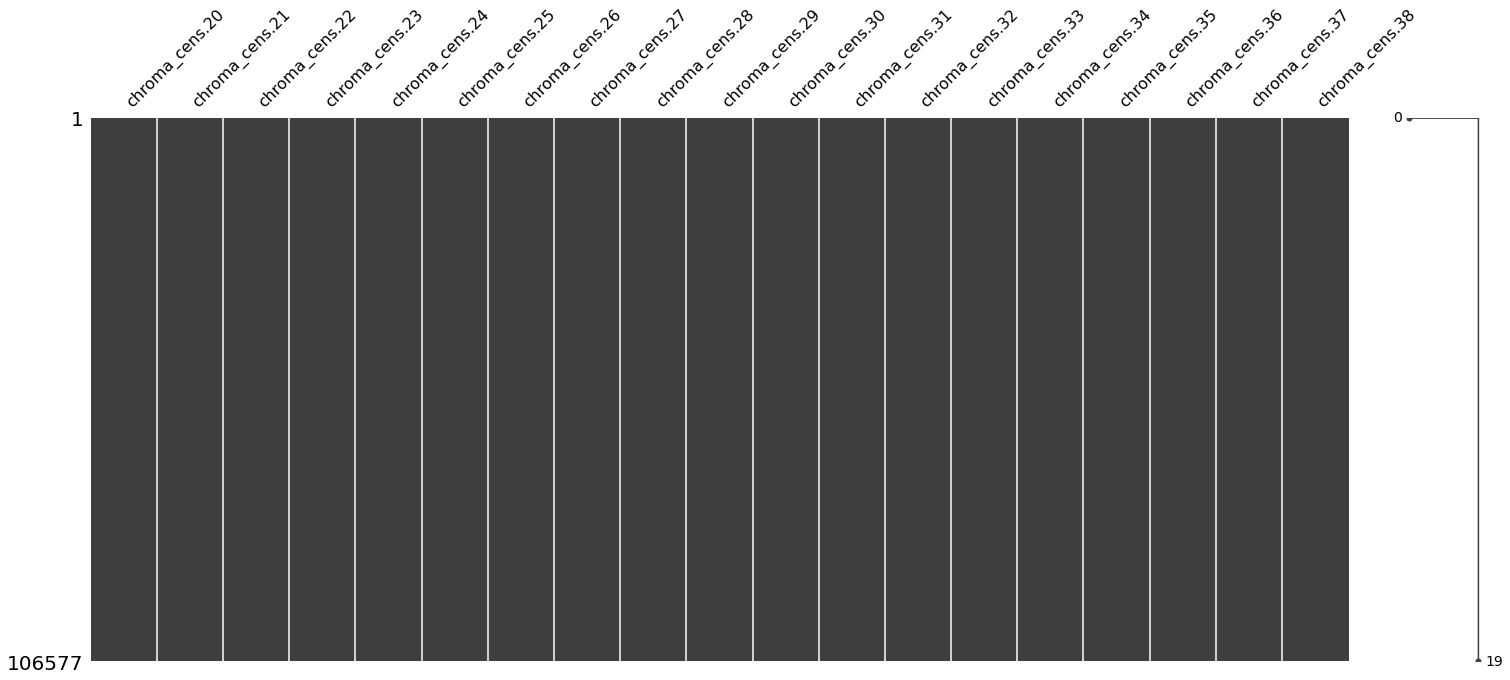

In [40]:
ms.matrix(features.iloc[:, 21:40])

#### Feature Engineering

In [41]:
features.iloc[0,0] = features.iloc[2, 0]

In [42]:
features.head(3)

feature chroma_cens chroma_cens.1 chroma_cens.2 chroma_cens.3  \
0  track_id    kurtosis      kurtosis      kurtosis      kurtosis   
1    number          01            02            03            04   
2  track_id         NaN           NaN           NaN           NaN   

  chroma_cens.4 chroma_cens.5 chroma_cens.6 chroma_cens.7 chroma_cens.8  \
0      kurtosis      kurtosis      kurtosis      kurtosis      kurtosis   
1            05            06            07            08            09   
2           NaN           NaN           NaN           NaN           NaN   

  chroma_cens.9 chroma_cens.10 chroma_cens.11 chroma_cens.12 chroma_cens.13  \
0      kurtosis       kurtosis       kurtosis            max            max   
1            10             11             12             01             02   
2           NaN            NaN            NaN            NaN            NaN   

  chroma_cens.14 chroma_cens.15 chroma_cens.16 chroma_cens.17 chroma_cens.18  \
0            max            max            max            max            max   
1             03             04             05             06             07   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.19 chroma_cens.20 chroma_cens.21 chroma_cens.22 chroma_cens.23  \
0            max            max            max            max            max   
1             08             09             10             11             12   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.24 chroma_cens.25 chroma_cens.26 chroma_cens.27 chroma_cens.28  \
0           mean           mean           mean           mean           mean   
1             01             02             03             04             05   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.29 chroma_cens.30 chroma_cens.31 chroma_cens.32 chroma_cens.33  \
0           mean           mean           mean           mean           mean   
1             06             07             08             09             10   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.34 chroma_cens.35 chroma_cens.36 chroma_cens.37 chroma_cens.38  \
0           mean           mean         median         median         median   
1             11             12             01             02             03   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.39 chroma_cens.40 chroma_cens.41 chroma_cens.42 chroma_cens.43  \
0         median         median         median         median         median   
1             04             05             06             07             08   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.44 chroma_cens.45 chroma_cens.46 chroma_cens.47 chroma_cens.48  \
0         median         median         median         median            min   
1             09             10             11             12             01   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.49 chroma_cens.50 chroma_cens.51 chroma_cens.52 chroma_cens.53  \
0            min            min            min            min            min   
1             02             03             04             05             06   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.54 chroma_cens.55 chroma_cens.56 chroma_cens.57 chroma_cens.58  \
0            min            min            min            min            min   
1             07             08             09             10             11   
2            NaN            NaN            NaN            NaN            NaN   

  chroma_cens.59 chroma_cens.60 chroma_cens.61 chroma_cens.62 chroma_cens.63  \
0            min           skew           skew           skew           skew   
1             12             01             02             0

In [43]:
features.drop(2, inplace=True)

In [44]:
len(features.columns)

519

In [45]:
len(features.iloc[0])

519

In [46]:
def combine_two_rows(df):
    columns = list(df.columns)
    for i in range(0, 519):
        columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns

In [47]:
features.columns = combine_two_rows(features)

In [48]:
features.drop([0, 1], inplace=True)

In [49]:
features.reset_index(inplace=True)

In [50]:
features.drop('index', axis=1, inplace=True)

In [51]:
features.head()

feature track_id chroma_cens kurtosis chroma_cens.1 kurtosis  \
0                2     7.1806526184e+00       5.2303090096e+00   
1                3     1.8889633417e+00       7.6053929329e-01   
2                5     5.2756297588e-01      -7.7654317021e-02   
3               10     3.7022454739e+00      -2.9119303823e-01   
4               20    -1.9383698702e-01      -1.9852678478e-01   

  chroma_cens.2 kurtosis chroma_cens.3 kurtosis chroma_cens.4 kurtosis  \
0       2.4932080507e-01       1.3476201296e+00       1.4824777842e+00   
1       3.4529656172e-01       2.2952005863e+00       1.6540306807e+00   
2      -2.7961030602e-01       6.8588310480e-01       1.9375696182e+00   
3       2.1967420578e+00      -2.3444947600e-01       1.3673638105e+00   
4       2.0154602826e-01       2.5855624676e-01       7.7520370483e-01   

  chroma_cens.5 kurtosis chroma_cens.6 kurtosis chroma_cens.7 kurtosis  \
0       5.3137123585e-01       1.4815930128e+00       2.6914546490e+00   
1       6.7592434585e-02       1.3668476343e+00       1.0540937185e+00   
2       8.8083887100e-01      -9.2319184542e-01      -9.2723226547e-01   
3       9.9841135740e-01       1.7706941366e+00       1.6045658588e+00   
4       8.4794059396e-02      -2.8929358721e-01      -8.1641042233e-01   

  chroma_cens.8 kurtosis chroma_cens.9 kurtosis chroma_cens.10 kurtosis  \
0       8.6686819792e-01       1.3412306309e+00        1.3477915525e+00   
1       1.0810308903e-01       6.1918509007e-01        1.0382531881e+00   
2       6.6661673784e-01       1.0385463238e+00        2.6893171668e-01   
3       5.2121698856e-01       1.9823863506e+00        4.3268237114e+00   
4       4.3850939721e-02      -8.0476069450e-01       -9.9095779657e-01   

  chroma_cens.11 kurtosis chroma_cens.12 max chroma_cens.13 max  \
0        1.2376583815e+00   6.9249993563e-01   5.6934404373e-01   
1        1.2922351360e+00   6.7764127254e-01   5.8424842358e-01   
2        1.1251406670e+00   6.1101400852e-01   6.5147054195e-01   
3        1.3004057407e+00   4.6184015274e-01   5.4041141272e-01   
4       -4.3038117886e-01   6.5286397934e-01   6.7628991604e-01   

  chroma_cens.14 max chroma_cens.15 max chroma_cens.16 max chroma_cens.17 max  \
0   5.9704089165e-01   6.2586373091e-01   5.6732958555e-01   4.4394925237e-01   
1   5.8127075434e-01   5.8118158579e-01   4.5424115658e-01   4.6484073997e-01   
2   4.9452754855e-01   4.4879883528e-01   4.6862444282e-01   4.5402124524e-01   
3   4.4670808315e-01   6.4755302668e-01   5.9190773964e-01   5.1330602169e-01   
4   6.7028784752e-01   5.9866631031e-01   6.5360695124e-01   6.9764536619e-01   

  chroma_cens.18 max chroma_cens.19 max chroma_cens.20 max chroma_cens.21 max  \
0   4.8797628284e-01   4.9732723832e-01   5.7443547249e-01   5.7924067974e-01   
1   5.4283261299e-01   6.6471982002e-01   5.1132947206e-01   5.3099834919e-01   
2   4.9717202783e-01   5.5975544453e-01   6.7128735781e-01   6.1056482792e-01   
3   6.5150094032e-01   5.1688706875e-01   5.1147907972e-01   4.7826284170e-01   
4   6.6492879391e-01   6.8656331301e-01   6.3511699438e-01   6.6739308834e-01   

  chroma_cens.22 max chroma_cens.23 max chroma_cens.24 mean  \
0   6.2010246515e-01   5.8694541454e-01    4.7430026531e-01   
1   6.0339796543e-01   5.4742807150e-01    2.3278446496e-01   
2   5.5166327953e-01   6.0341262817e-01    2.5841978192e-01   
3   6.3876610994e-01   6.3849490881e-01    2.2988221049e-01   
4   6.8958860636e-01   6.8319565058e-01    2.0280598104e-01   

  chroma_cens.25 mean chroma_cens.26 mean chroma_cens.27 mean  \
0    3.6981594563e-01    2.3611885309e-01    2.2806788981e-01   
1    2.2946873307e-01    2.2567413747e-01    2.1671250463e-01   
2    3.0338549614e-01    2.5073742867e-01    2.1856224537e-01   
3    2.8697809577e-01    2.4009644985e-01    2.2679224610e-01   
4    2.4512499571e-01    2.6299744844e-01    1.8796080351e-01   

  chroma_cens.28 mean chroma_cens.29 mean chroma_cens.30 mean  \
0    2.2282999754e-01    2.2141483426e-01    2.29238

In [52]:
features = features.astype(dtype='float')
features['feature track_id'] = features['feature track_id'].astype('int')

<AxesSubplot:>

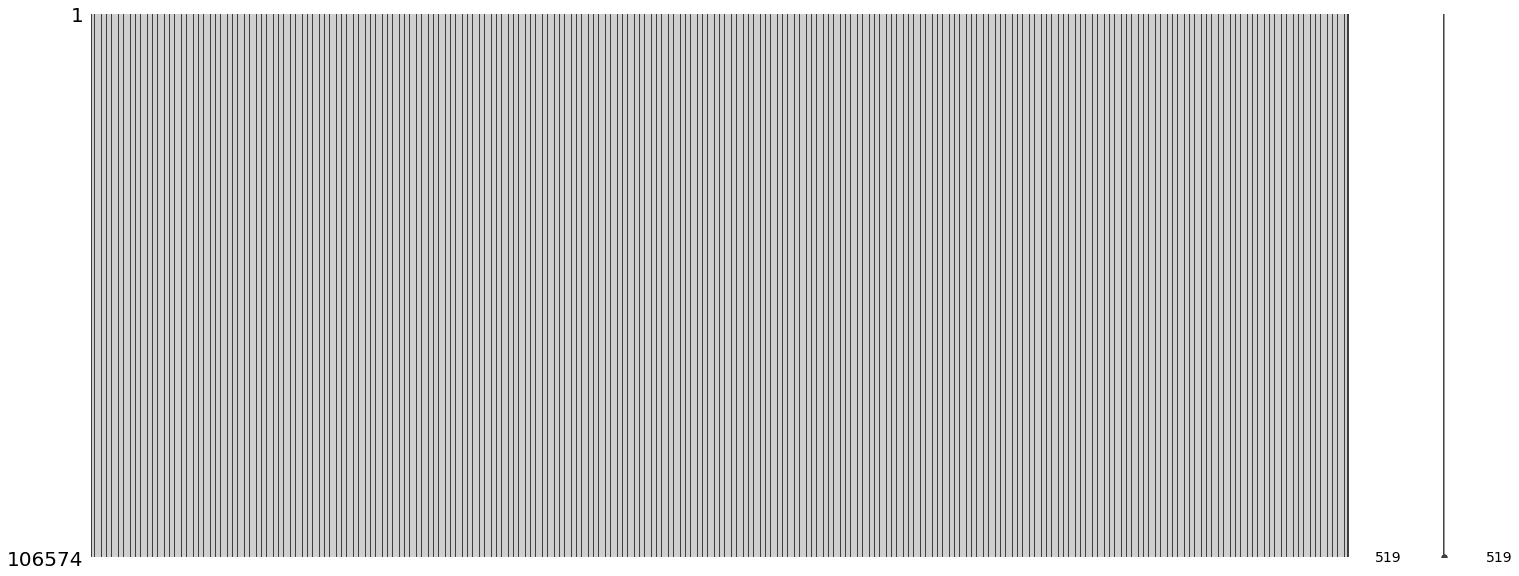

In [53]:
ms.matrix(features)

In [54]:
features.head(3)

feature track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0                 2              7.180653                5.230309   
1                 3              1.888963                0.760539   
2                 5              0.527563               -0.077654   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                1.347620                1.482478   
1                0.345297                2.295201                1.654031   
2               -0.279610                0.685883                1.937570   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   
1                0.067592                1.366848                1.054094   
2                0.880839               -0.923192               -0.927232   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   
1                0.108103                0.619185                 1.038253   
2                0.666617                1.038546                 0.268932   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658            0.692500            0.569344   
1                 1.292235            0.677641            0.584248   
2                 1.125141            0.611014            0.651471   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864            0.567330   
1            0.581271            0.581182            0.454241   
2            0.494528            0.448799            0.468624   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   
1            0.464841            0.542833            0.664720   
2            0.454021            0.497172            0.559755   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   
1            0.511329            0.530998            0.603398   
2            0.671287            0.610565            0.551663   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945             0.474300             0.369816   
1            0.547428             0.232784             0.229469   
2            0.603413             0.258420             0.303385   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068             0.222830   
1             0.225674             0.216713             0.220512   
2             0.250737             0.218562             0.245743   

   chroma_cens.29 mean  chroma_cens.30 mean  chroma_cens.31 mean  \
0             0.221415             0.229238             0.248795   
1             0.242744             0.369235             0.420716   
2             0.236018             0.275766             0.293982   

   chroma_cens.32 mean  chroma_cens.33 mean  chroma_cens.34 mean  \
0             0.196245             0.175809             0.200713   
1             0.312129             0.242748             0.264292   
2             0.346324             0.289821             0.246368   

   chroma_cens.35 mean  chroma_cens.36 median  chroma_cens.37 median  \
0             0.319972               0.482825               0.387652   
1             0.225683               0.230579               0.228059   
2             0.220939               0.255472               0.293571   

   chroma_cens.38 median  chroma_cens.39 median  chroma_cens.40 median  \
0               0.249082               0.238187               0.233066   
1               0.209370               0.202267               0.230913   
2               0.245253               0.222065               0.247063   

   chroma_cens.41 median  chroma_cens.42 median  chroma_c

### Working with 'Tracks' dataset

#### Analysing Data

In [55]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106576 entries, 0 to 106575
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  106575 non-null  object
 1   album       106575 non-null  object
 2   album.1     103046 non-null  object
 3   album.2     70295 non-null   object
 4   album.3     15296 non-null   object
 5   album.4     106575 non-null  object
 6   album.5     106575 non-null  object
 7   album.6     83150 non-null   object
 8   album.7     106575 non-null  object
 9   album.8     18061 non-null   object
 10  album.9     106575 non-null  object
 11  album.10    105550 non-null  object
 12  album.11    106575 non-null  object
 13  album.12    100067 non-null  object
 14  artist      22712 non-null   object
 15  artist.1    5376 non-null    object
 16  artist.2    14272 non-null   object
 17  artist.3    71157 non-null   object
 18  artist.4    106575 non-null  object
 19  artist.5    105719 non-

In [56]:
tracks.head()

Unnamed: 0     album              album.1              album.2   album.3  \
0        NaN  comments         date_created        date_released  engineer   
1   track_id       NaN                  NaN                  NaN       NaN   
2          2         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
3          3         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
4          5         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   

     album.4 album.5      album.6  album.7   album.8 album.9  \
0  favorites      id  information  listens  producer    tags   
1        NaN     NaN          NaN      NaN       NaN     NaN   
2          4       1      <p></p>     6073       NaN      []   
3          4       1      <p></p>     6073       NaN      []   
4          4       1      <p></p>     6073       NaN      []   

               album.10 album.11 album.12               artist  \
0                 title   tracks     type    active_year_begin   
1                   NaN      NaN      NaN                  NaN   
2  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
3  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
4  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   

          artist.1           artist.2  \
0  active_year_end  associated_labels   
1              NaN                NaN   
2              NaN                NaN   
3              NaN                NaN   
4              NaN                NaN   

                                            artist.3  artist.4  \
0                                                bio  comments   
1                                                NaN       NaN   
2  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
3  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
4  <p>A Way Of Life, A Collective of Hip-Hop from...         0   

              artist.5   artist.6 artist.7    artist.8    artist.9  \
0         date_created  favorites       id    latitude    location   
1                  NaN        NaN      NaN         NaN         NaN   
2  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
3  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
4  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   

     artist.10                                          artist.11 artist.12  \
0    longitude                                            members      name   
1          NaN                                                NaN       NaN   
2  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...      AWOL   
3  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...      AWOL   
4  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...      AWOL   

                                           artist.13 artist.14  \
0                                   related_projects      tags   
1                                                NaN       NaN   
2  The list of past projects is 2 long but every1...  ['awol']   
3  The list of past projects is 2 long but every1...  ['awol']   
4  The list of past projects is 2 long but every1...  ['awol']   

                                 artist.15       artist.16       set   set.1  \
0                                  website  wikipedia_page     split  subset   
1                                      NaN             NaN       NaN     NaN   
2  http://www.AzillionRecords.blogspot.com             NaN  training   small   
3  http://www.AzillionRecords.blogspot.com             NaN  training  medium   
4  http://www.AzillionRecords.blogspot.com             NaN  training   small   

      track   track.1   track.2              track.3              track.4  \
0  bit_rate  comments  composer         date_created        date_recorded   
1       NaN       NaN       NaN                  NaN                  NaN   
2    256000         0       NaN  2008-11-26 01:48:12  2008-11-26 00:00:00   
3    256000         0    

In [57]:
tracks.iloc[0,0] = tracks.iloc[1, 0]

In [58]:
tracks.drop(1, axis=0, inplace=True)

In [59]:
tracks.head()

Unnamed: 0     album              album.1              album.2   album.3  \
0   track_id  comments         date_created        date_released  engineer   
2          2         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
3          3         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
4          5         0  2008-11-26 01:44:45  2009-01-05 00:00:00       NaN   
5         10         0  2008-11-26 01:45:08  2008-02-06 00:00:00       NaN   

     album.4 album.5      album.6  album.7   album.8 album.9  \
0  favorites      id  information  listens  producer    tags   
2          4       1      <p></p>     6073       NaN      []   
3          4       1      <p></p>     6073       NaN      []   
4          4       1      <p></p>     6073       NaN      []   
5          4       6          NaN    47632       NaN      []   

               album.10 album.11 album.12               artist  \
0                 title   tracks     type    active_year_begin   
2  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
3  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
4  AWOL - A Way Of Life        7    Album  2006-01-01 00:00:00   
5     Constant Hitmaker        2    Album                  NaN   

          artist.1                                           artist.2  \
0  active_year_end                                  associated_labels   
2              NaN                                                NaN   
3              NaN                                                NaN   
4              NaN                                                NaN   
5              NaN  Mexican Summer, Richie Records, Woodsist, Skul...   

                                            artist.3  artist.4  \
0                                                bio  comments   
2  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
3  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
4  <p>A Way Of Life, A Collective of Hip-Hop from...         0   
5  <p><span style="font-family:Verdana, Geneva, A...         3   

              artist.5   artist.6 artist.7    artist.8    artist.9  \
0         date_created  favorites       id    latitude    location   
2  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
3  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
4  2008-11-26 01:42:32          9        1  40.0583238  New Jersey   
5  2008-11-26 01:42:55         74        6         NaN         NaN   

     artist.10                                          artist.11  artist.12  \
0    longitude                                            members       name   
2  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...       AWOL   
3  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...       AWOL   
4  -74.4056612  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...       AWOL   
5          NaN                           Kurt Vile, the Violators  Kurt Vile   

                                           artist.13                artist.14  \
0                                   related_projects                     tags   
2  The list of past projects is 2 long but every1...                 ['awol']   
3  The list of past projects is 2 long but every1...                 ['awol']   
4  The list of past projects is 2 long but every1...                 ['awol']   
5                                                NaN  ['philly', 'kurt vile']   

                                 artist.15       artist.16       set   set.1  \
0                                  website  wikipedia_page     split  subset   
2  http://www.AzillionRecords.blogspot.com             NaN  training   small   
3  http://www.AzillionRecords.blogspot.com             NaN  training  medium   
4  http://www.AzillionRecords.blogspot.com             NaN  training   small   
5                      http://kurtvile.com             NaN  training   small   

      track   track.1    track.2             

#### Feature Engineering

In [60]:
len(tracks.columns)

53

In [61]:
def combine_one_row(df):
    columns = list(df.columns)
    for i in range(0, 53):
        if i == 0:
            columns[i] = df.iloc[0, i]
        else:
            columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns

In [62]:
tracks.columns = combine_one_row(tracks)

In [63]:
tracks.drop(0, inplace=True)

In [64]:
tracks.reset_index(inplace=True)

In [65]:
tracks.drop(['index'], axis=1, inplace=True)

<AxesSubplot:>

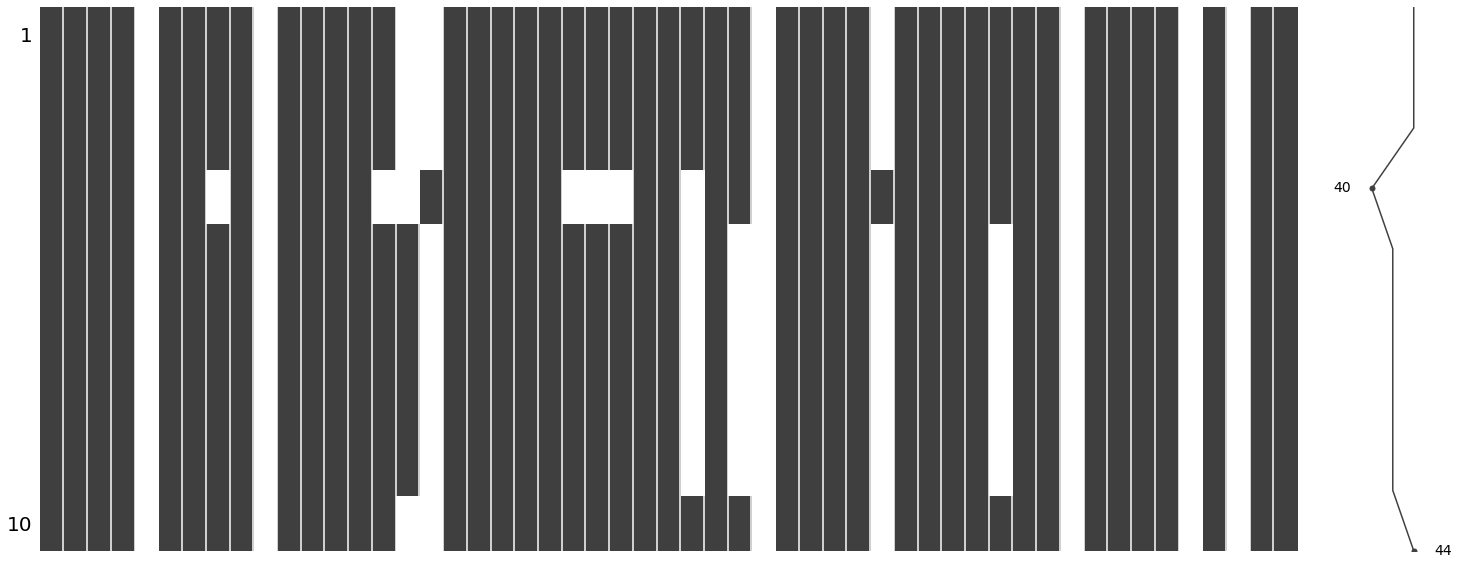

In [66]:
ms.matrix(tracks.iloc[0: 10])

In [67]:
tracks.head()

track_id album comments album.1 date_created album.2 date_released  \
0        2              0  2008-11-26 01:44:45   2009-01-05 00:00:00   
1        3              0  2008-11-26 01:44:45   2009-01-05 00:00:00   
2        5              0  2008-11-26 01:44:45   2009-01-05 00:00:00   
3       10              0  2008-11-26 01:45:08   2008-02-06 00:00:00   
4       20              0  2008-11-26 01:45:05   2009-01-06 00:00:00   

  album.3 engineer album.4 favorites album.5 id  \
0              NaN                 4          1   
1              NaN                 4          1   
2              NaN                 4          1   
3              NaN                 4          6   
4              NaN                 2          4   

                         album.6 information album.7 listens album.8 producer  \
0                                    <p></p>            6073              NaN   
1                                    <p></p>            6073              NaN   
2                                    <p></p>            6073              NaN   
3                                        NaN           47632              NaN   
4  <p> "spiritual songs" from Nicky Cook</p>            2710              NaN   

  album.9 tags        album.10 title album.11 tracks album.12 type  \
0           []  AWOL - A Way Of Life               7         Album   
1           []  AWOL - A Way Of Life               7         Album   
2           []  AWOL - A Way Of Life               7         Album   
3           []     Constant Hitmaker               2         Album   
4           []                 Niris              13         Album   

  artist active_year_begin artist.1 active_year_end  \
0      2006-01-01 00:00:00                      NaN   
1      2006-01-01 00:00:00                      NaN   
2      2006-01-01 00:00:00                      NaN   
3                      NaN                      NaN   
4      1990-01-01 00:00:00      2011-01-01 00:00:00   

                          artist.2 associated_labels  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Mexican Summer, Richie Records, Woodsist, Skul...   
4                                                NaN   

                                        artist.3 bio artist.4 comments  \
0  <p>A Way Of Life, A Collective of Hip-Hop from...                 0   
1  <p>A Way Of Life, A Collective of Hip-Hop from...                 0   
2  <p>A Way Of Life, A Collective of Hip-Hop from...                 0   
3  <p><span style="font-family:Verdana, Geneva, A...                 3   
4  <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...                 2   

  artist.5 date_created artist.6 favorites artist.7 id artist.8 latitude  \
0   2008-11-26 01:42:32                  9           1        40.0583238   
1   2008-11-26 01:42:32                  9           1        40.0583238   
2   2008-11-26 01:42:32                  9           1        40.0583238   
3   2008-11-26 01:42:55                 74           6               NaN   
4   2008-11-26 01:42:52                 10           4         51.895927   

    artist.9 location artist.10 longitude  \
0          New Jersey         -74.4056612   
1          New Jersey         -74.4056612   
2          New Jersey         -74.4056612   
3                 NaN                 NaN   
4  Colchester England            0.891874   

                                   artist.11 members artist.12 name  \
0  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...           AWOL   
1  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...           AWOL   
2  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...           AWOL   
3                           Kurt Vile, the Violators      Kurt Vile   
4                                       Nicky Cook\n     Nicky Cook   

                          artist.13 related_projects  \
0  The list of past projects i

In [68]:
tracks['track.7 genre_top'].value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: track.7 genre_top, dtype: int64

In [69]:
track_title = pd.DataFrame(tracks['track.19 title'])

In [70]:
track_title['track_id'] = tracks['track_id']

In [71]:
track_title.head()

track.19 title track_id
0             Food        2
1     Electric Ave        3
2       This World        5
3          Freeway       10
4  Spiritual Level       20

In [72]:
track_title.tail()

track.19 title track_id
106569                                  The Auger   155316
106570                            Let's Skin Ruby   155317
106571         My House Smells Like Kim Deal/Pulp   155318
106572                    The Man With Two Mouths   155319
106573  Another Trick Up My Sleeve (Instrumental)   155320

In [73]:
track_title.shape

(106574, 2)

In [74]:
tracks.drop(['album comments','album.1 date_created', 
             'album.2 date_released', 'album.11 tracks', 
             'album.9 tags', 'album.8 producer', 'album.3 engineer', 'album.6 information',
             'artist active_year_begin', 'artist.1 active_year_end', 'artist.2 associated_labels',
             'artist.3 bio','artist.4 comments','artist.5 date_created', 'artist.7 id',
             'artist.8 latitude','artist.9 location','artist.10 longitude', 'artist.11 members',
             'artist.13 related_projects', 'artist.14 tags','artist.15 website','artist.16 wikipedia_page',
             'set.1 subset', 'track.1 comments', 'track.2 composer', 'track.3 date_created', 'track.4 date_recorded',
             'track.10 information', 'track.13 license', 'track.15 lyricist', 'track.17 publisher', 'track.18 tags',
             'track.19 title'], axis=1, inplace=True)

In [75]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   track_id                106574 non-null  object
 1   album.4 favorites       106574 non-null  object
 2   album.5 id              106574 non-null  object
 3   album.7 listens         106574 non-null  object
 4   album.10 title          105549 non-null  object
 5   album.12 type           100066 non-null  object
 6   artist.6 favorites      106574 non-null  object
 7   artist.12 name          106574 non-null  object
 8   set split               106574 non-null  object
 9   track bit_rate          106574 non-null  object
 10  track.5 duration        106574 non-null  object
 11  track.6 favorites       106574 non-null  object
 12  track.7 genre_top       49598 non-null   object
 13  track.8 genres          106574 non-null  object
 14  track.9 genres_all      106574 non-n

<AxesSubplot:>

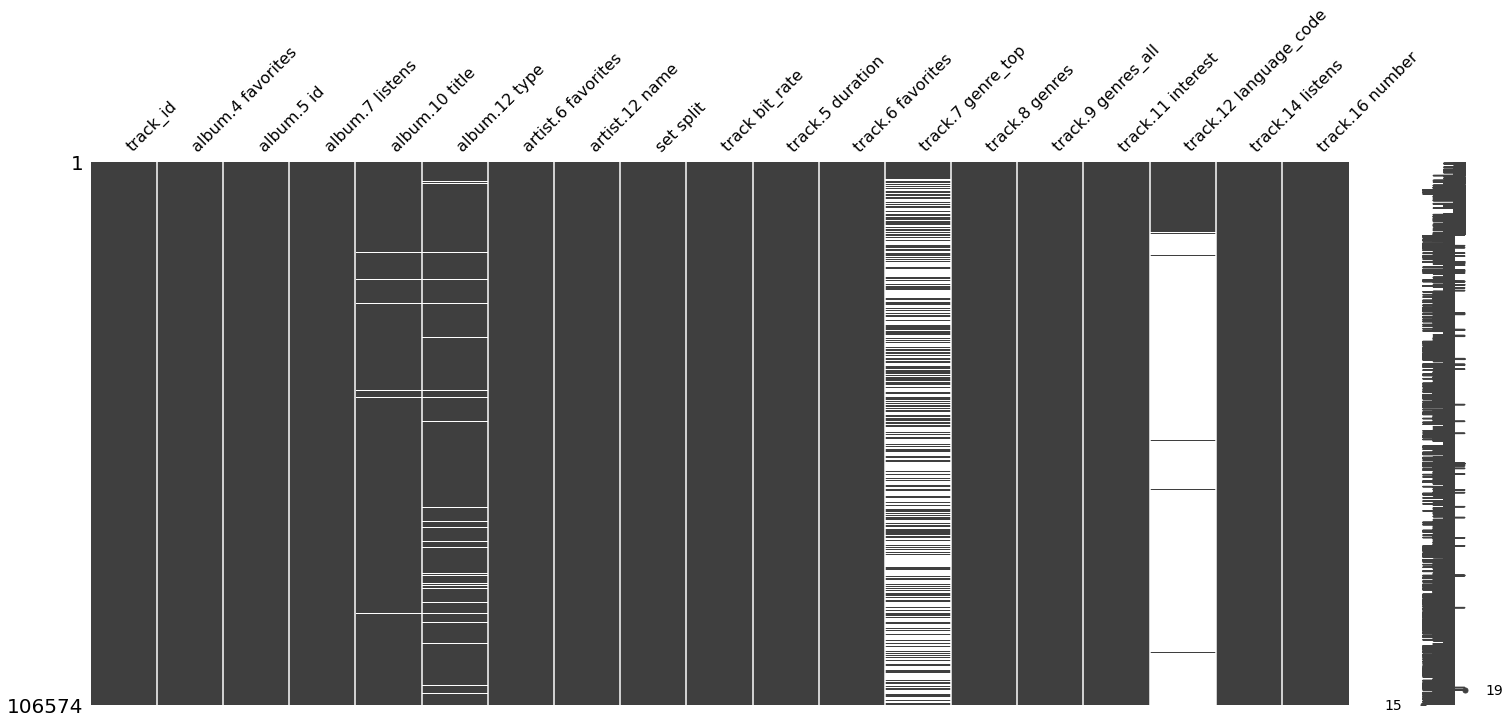

In [76]:
ms.matrix(tracks)

In [77]:
tracks['album.12 type'].value_counts()

Album               87549
Radio Program        6551
Live Performance     5035
Single Tracks         917
Contest                14
Name: album.12 type, dtype: int64

In [78]:
tracks['album.10 title'].value_counts()

microSong Entries                                              310
Sectioned v4.0                                                 200
Live at the 2014 Golden Festival                               168
INTO INFINITY: an exploration of on and on and on and on...    151
Necktar Volume 6                                               150
                                                              ... 
Wasteland Vol. 4                                                 1
Rockers - Single                                                 1
Live at SF Bay Area Ladyfest 2004                                1
[EPV_083] Connect with Gallery Six                               1
Growing Live at ATP NY on WFMU 9/20/2008                         1
Name: album.10 title, Length: 14298, dtype: int64

In [79]:
tracks['album.10 title'].fillna(method='ffill', inplace=True)

In [80]:
tracks.drop(['track.12 language_code', 'album.12 type'], axis=1, inplace=True)

In [81]:
tracks.drop('track.9 genres_all', axis=1, inplace=True)

<AxesSubplot:>

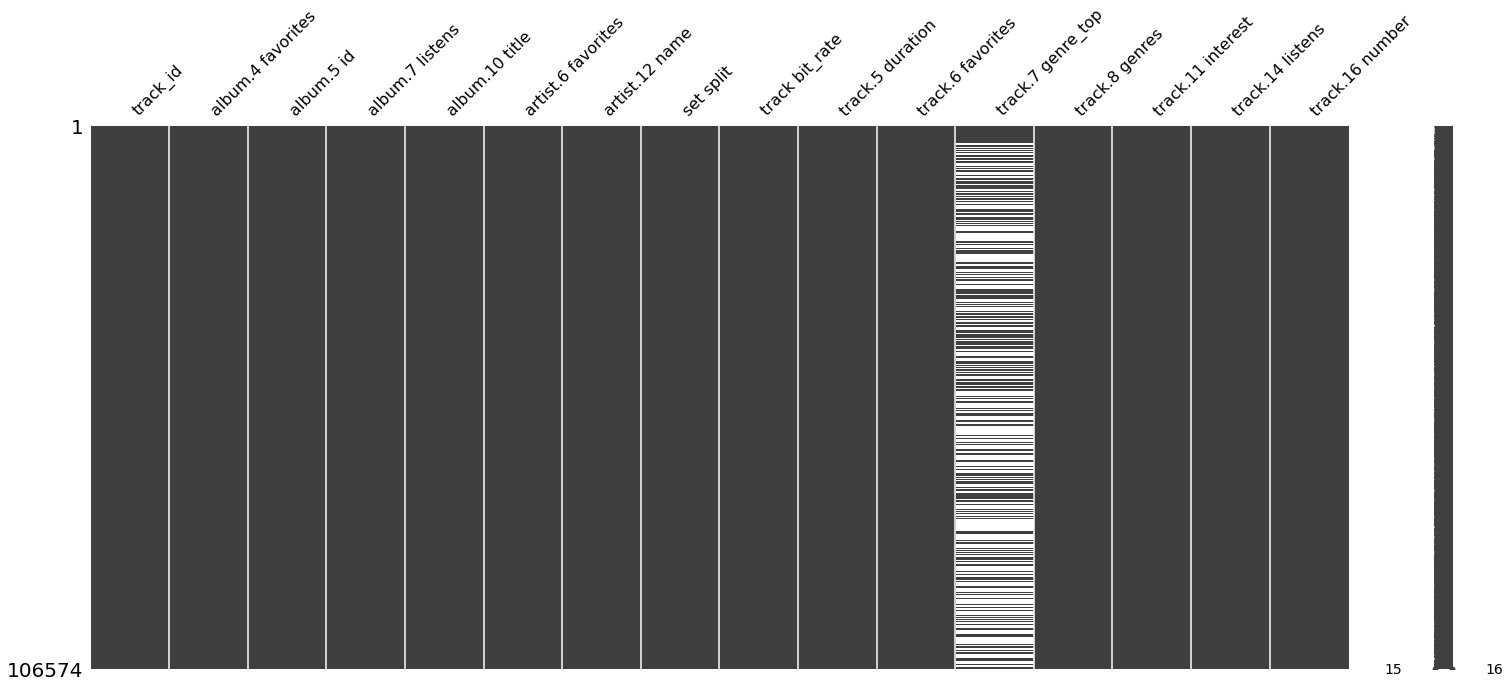

In [82]:
ms.matrix(tracks)

In [83]:
tracks['track.8 genres'].unique()

array(['[21]', '[10]', '[76, 103]', ..., '[17, 63, 1235]',
       '[42, 107, 183]', '[10, 12, 169]'], dtype=object)

In [84]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


In [85]:
type(tracks['track.7 genre_top'].iloc[27])

str

In [86]:
def getList(cd):
    return cd[1:-1].split(',')

In [87]:
for i in range(0, 106574):
    if type(tracks['track.7 genre_top'][i]) == float:
        genre_list = getList(str(tracks['track.8 genres'][i]))
        count = len(genre_list)
        title = ""
        for j in range(0, count):
            title = title + str(genres['title'][j]) + str('|')
        tracks['track.7 genre_top'][i] = title

### Working with 'Genre' dataset

#### Analysing Data

In [88]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


<AxesSubplot:>

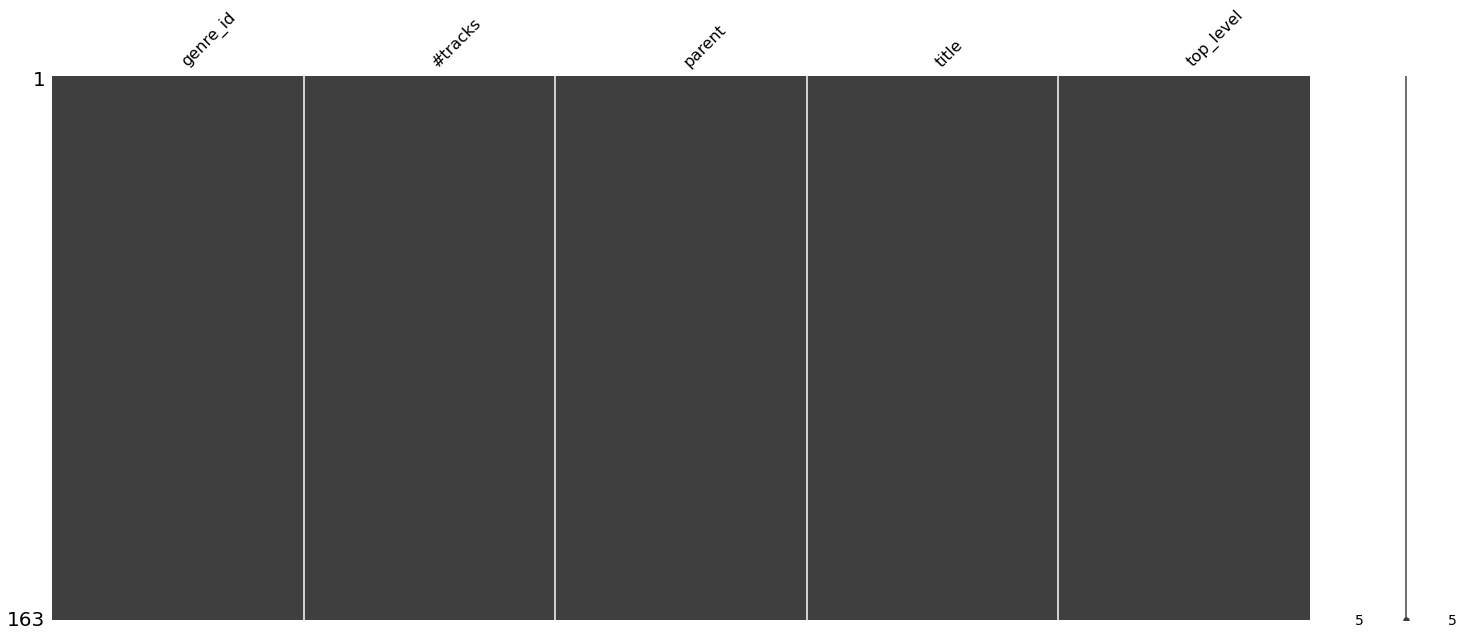

In [89]:
ms.matrix(genres)

In [90]:
genres.head()

genre_id  #tracks  parent          title  top_level
0         1     8693      38    Avant-Garde         38
1         2     5271       0  International          2
2         3     1752       0          Blues          3
3         4     4126       0           Jazz          4
4         5     4106       0      Classical          5

#### Feature Engineering

Nothing to engineer!

### Combining all datasets into a single entity

#### Analysing Data

In [91]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 240 entries, track_id to 223
dtypes: float64(237), object(3)
memory usage: 24.0+ MB


In [92]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   track_id            106574 non-null  object
 1   album.4 favorites   106574 non-null  object
 2   album.5 id          106574 non-null  object
 3   album.7 listens     106574 non-null  object
 4   album.10 title      106574 non-null  object
 5   artist.6 favorites  106574 non-null  object
 6   artist.12 name      106574 non-null  object
 7   set split           106574 non-null  object
 8   track bit_rate      106574 non-null  object
 9   track.5 duration    106574 non-null  object
 10  track.6 favorites   106574 non-null  object
 11  track.7 genre_top   106574 non-null  object
 12  track.8 genres      106574 non-null  object
 13  track.11 interest   106574 non-null  object
 14  track.14 listens    106574 non-null  object
 15  track.16 number     106574 non-null  object
dtypes:

In [93]:
tracks.head()

track_id album.4 favorites album.5 id album.7 listens        album.10 title  \
0        2                 4          1            6073  AWOL - A Way Of Life   
1        3                 4          1            6073  AWOL - A Way Of Life   
2        5                 4          1            6073  AWOL - A Way Of Life   
3       10                 4          6           47632     Constant Hitmaker   
4       20                 2          4            2710                 Niris   

  artist.6 favorites artist.12 name set split track bit_rate track.5 duration  \
0                  9           AWOL  training         256000              168   
1                  9           AWOL  training         256000              237   
2                  9           AWOL  training         256000              206   
3                 74      Kurt Vile  training         192000              161   
4                 10     Nicky Cook  training         256000              311   

  track.6 favorites           track.7 genre_top track.8 genres  \
0                 2                     Hip-Hop           [21]   
1                 1                     Hip-Hop           [21]   
2                 6                     Hip-Hop           [21]   
3               178                         Pop           [10]   
4                 0  Avant-Garde|International|      [76, 103]   

  track.11 interest track.14 listens track.16 number  
0              4656             1293               3  
1              1470              514               4  
2              1933             1151               6  
3             54881            50135               1  
4               978              361               3

In [94]:
echonest.head()

0 track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0        2      0.416675      0.675894  0.634476          0.010628  0.177647   
1        3      0.374408      0.528643  0.817461          0.001851  0.105880   
2        5      0.043567      0.745566  0.701470          0.000697  0.373143   
3       10      0.951670      0.658179  0.924525          0.965427  0.115474   
4      134      0.452217      0.513238  0.560410          0.019443  0.096567   

0  speechiness    tempo   valence artist_name               release  \
0     0.159310  165.922  0.576661        AWOL  AWOL - A Way Of Life   
1     0.461818  126.957  0.269240        AWOL  AWOL - A Way Of Life   
2     0.124595  100.260  0.621661        AWOL  AWOL - A Way Of Life   
3     0.032985  111.562  0.963590   Kurt Vile     Constant Hitmaker   
4     0.525519  114.290  0.894072        AWOL  AWOL - A Way Of Life   

0  artist_discovery  artist_familiarity  artist_hotttnesss  song_currency  \
0          0.388990            0.386740           0.406370       0.000000   
1          0.388990            0.386740           0.406370       0.000000   
2          0.388990            0.386740           0.406370       0.000000   
3          0.557339            0.614272           0.798387       0.005158   
4          0.388990            0.386740           0.406370       0.000000   

0  song_hotttnesss       000       001       002       003       004  \
0         0.000000  0.877233  0.588911  0.354243  0.295090  0.298413   
1         0.000000  0.534429  0.537414  0.443299  0.390879  0.344573   
2         0.000000  0.548093  0.720192  0.389257  0.344934  0.361300   
3         0.354516  0.311404  0.711402  0.321914  0.500601  0.250963   
4         0.000000  0.610849  0.569169  0.428494  0.345796  0.376920   

0       005       006       007       008       009       010       011  \
0  0.309430  0.304496  0.334579  0.249495  0.259656  0.318376  0.371974   
1  0.366448  0.419455  0.747766  0.460901  0.392379  0.474559  0.406729   
2  0.402543  0.434044  0.388137  0.512487  0.525755  0.425371  0.446896   
3  0.321316  0.734250  0.325188  0.373012  0.235840  0.368756  0.440775   
4  0.460590  0.401371  0.449900  0.428946  0.446736  0.479849  0.378221   

0    012     013    014     015     016     017     018    019     020  \
0  1.000  0.5710  0.278  0.2100  0.2150  0.2285  0.2375  0.279  0.1685   
1  0.506  0.5145  0.387  0.3235  0.2805  0.3135  0.3455  0.898  0.4365   
2  0.511  0.7720  0.361  0.2880  0.3310  0.3720  0.3590  0.279  0.4430   
3  0.263  0.7360  0.273  0.4260  0.2140  0.2880  0.8100  0.246  0.2950   
4  0.614  0.5450  0.363  0.2800  0.3110  0.3970  0.3170  0.404  0.3560   

0     021    022     023       024       025       026       027       028  \
0  0.1685  0.279  0.3325  0.049848  0.104212  0.060230  0.052290  0.047403   
1  0.3385  0.398  0.3480  0.079207  0.083319  0.073595  0.071024  0.056679   
2  0.4840  0.368  0.3970  0.081051  0.078300  0.048697  0.056922  0.045264   
3  0.1640  0.311  0.3860  0.033969  0.070692  0.039161  0.095781  0.024102   
4  0.3800  0.420  0.2920  0.085176  0.092242  0.073183  0.056354  0.062012   

0       029       030       031       032       033       034       035  \
0  0.052815  0.052733  0.062216  0.051613  0.057399  0.053199  0.062583   
1  0.066113  0.073889  0.088100  0.071305  0.059275  0.088222  0.067298   
2  0.066819  0.094489  0.089250  0.098089  0.084133  0.068866  0.086224   
3  0.028497  0.073847  0.045103  0.065468  0.041634  0.041619  0.084442   
4  0.088343  0.077084  0.097942  0.101790  0.094533  0.089367  0.088544   

0    036    037    038    039    040    041    042    043    044    045  \
0  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041  0.010  0.009   
1  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053  0.022  0.032   
2  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022  0.040  0.026   
3  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038  0.022  0.009   
4  0.

In [95]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


In [96]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Columns: 519 entries, feature track_id to zcr.6 std
dtypes: float64(518), int32(1)
memory usage: 421.6 MB


#### Feature Engineering

In [97]:
features.columns = ['track_id'] + list(features.columns[1:])

In [98]:
features.head()

track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0         2              7.180653                5.230309   
1         3              1.888963                0.760539   
2         5              0.527563               -0.077654   
3        10              3.702245               -0.291193   
4        20             -0.193837               -0.198527   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                1.347620                1.482478   
1                0.345297                2.295201                1.654031   
2               -0.279610                0.685883                1.937570   
3                2.196742               -0.234449                1.367364   
4                0.201546                0.258556                0.775204   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   
1                0.067592                1.366848                1.054094   
2                0.880839               -0.923192               -0.927232   
3                0.998411                1.770694                1.604566   
4                0.084794               -0.289294               -0.816410   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   
1                0.108103                0.619185                 1.038253   
2                0.666617                1.038546                 0.268932   
3                0.521217                1.982386                 4.326824   
4                0.043851               -0.804761                -0.990958   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658            0.692500            0.569344   
1                 1.292235            0.677641            0.584248   
2                 1.125141            0.611014            0.651471   
3                 1.300406            0.461840            0.540411   
4                -0.430381            0.652864            0.676290   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864            0.567330   
1            0.581271            0.581182            0.454241   
2            0.494528            0.448799            0.468624   
3            0.446708            0.647553            0.591908   
4            0.670288            0.598666            0.653607   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   
1            0.464841            0.542833            0.664720   
2            0.454021            0.497172            0.559755   
3            0.513306            0.651501            0.516887   
4            0.697645            0.664929            0.686563   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   
1            0.511329            0.530998            0.603398   
2            0.671287            0.610565            0.551663   
3            0.511479            0.478263            0.638766   
4            0.635117            0.667393            0.689589   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945             0.474300             0.369816   
1            0.547428             0.232784             0.229469   
2            0.603413             0.258420             0.303385   
3            0.638495             0.229882             0.286978   
4            0.683196             0.202806             0.245125   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068             0.222830   
1             0.225674             0.216713             0.220512   
2             0.250737             0.218

In [99]:
type(echonest['track_id'].iloc[0])

str

In [100]:
echonest['track_id'] = echonest['track_id'].astype('int')
tracks['track_id'] = tracks['track_id'].astype('int')

In [101]:
features.sort_values(by='track_id', inplace=True)
tracks.sort_values(by='track_id', inplace=True)
echonest.sort_values(by='track_id', inplace=True)

In [102]:
features.head()

track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0         2              7.180653                5.230309   
1         3              1.888963                0.760539   
2         5              0.527563               -0.077654   
3        10              3.702245               -0.291193   
4        20             -0.193837               -0.198527   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                1.347620                1.482478   
1                0.345297                2.295201                1.654031   
2               -0.279610                0.685883                1.937570   
3                2.196742               -0.234449                1.367364   
4                0.201546                0.258556                0.775204   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   
1                0.067592                1.366848                1.054094   
2                0.880839               -0.923192               -0.927232   
3                0.998411                1.770694                1.604566   
4                0.084794               -0.289294               -0.816410   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   
1                0.108103                0.619185                 1.038253   
2                0.666617                1.038546                 0.268932   
3                0.521217                1.982386                 4.326824   
4                0.043851               -0.804761                -0.990958   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658            0.692500            0.569344   
1                 1.292235            0.677641            0.584248   
2                 1.125141            0.611014            0.651471   
3                 1.300406            0.461840            0.540411   
4                -0.430381            0.652864            0.676290   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864            0.567330   
1            0.581271            0.581182            0.454241   
2            0.494528            0.448799            0.468624   
3            0.446708            0.647553            0.591908   
4            0.670288            0.598666            0.653607   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   
1            0.464841            0.542833            0.664720   
2            0.454021            0.497172            0.559755   
3            0.513306            0.651501            0.516887   
4            0.697645            0.664929            0.686563   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   
1            0.511329            0.530998            0.603398   
2            0.671287            0.610565            0.551663   
3            0.511479            0.478263            0.638766   
4            0.635117            0.667393            0.689589   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945             0.474300             0.369816   
1            0.547428             0.232784             0.229469   
2            0.603413             0.258420             0.303385   
3            0.638495             0.229882             0.286978   
4            0.683196             0.202806             0.245125   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068             0.222830   
1             0.225674             0.216713             0.220512   
2             0.250737             0.218

In [103]:
tracks.head()

track_id album.4 favorites album.5 id album.7 listens  \
0         2                 4          1            6073   
1         3                 4          1            6073   
2         5                 4          1            6073   
3        10                 4          6           47632   
4        20                 2          4            2710   

         album.10 title artist.6 favorites artist.12 name set split  \
0  AWOL - A Way Of Life                  9           AWOL  training   
1  AWOL - A Way Of Life                  9           AWOL  training   
2  AWOL - A Way Of Life                  9           AWOL  training   
3     Constant Hitmaker                 74      Kurt Vile  training   
4                 Niris                 10     Nicky Cook  training   

  track bit_rate track.5 duration track.6 favorites  \
0         256000              168                 2   
1         256000              237                 1   
2         256000              206                 6   
3         192000              161               178   
4         256000              311                 0   

            track.7 genre_top track.8 genres track.11 interest  \
0                     Hip-Hop           [21]              4656   
1                     Hip-Hop           [21]              1470   
2                     Hip-Hop           [21]              1933   
3                         Pop           [10]             54881   
4  Avant-Garde|International|      [76, 103]               978   

  track.14 listens track.16 number  
0             1293               3  
1              514               4  
2             1151               6  
3            50135               1  
4              361               3

In [104]:
count = 0
for i in range(0, 106574):
    if features['track_id'][i] == tracks['track_id'][i]:
        count += 1
    else:
        print(features['track_id'][i], tracks['track_id'][i])

In [105]:
final = pd.concat([features, tracks.drop('track_id', axis=1)], axis=1)

In [106]:
final.shape

(106574, 534)

In [107]:
final.head()

track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0         2              7.180653                5.230309   
1         3              1.888963                0.760539   
2         5              0.527563               -0.077654   
3        10              3.702245               -0.291193   
4        20             -0.193837               -0.198527   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                1.347620                1.482478   
1                0.345297                2.295201                1.654031   
2               -0.279610                0.685883                1.937570   
3                2.196742               -0.234449                1.367364   
4                0.201546                0.258556                0.775204   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   
1                0.067592                1.366848                1.054094   
2                0.880839               -0.923192               -0.927232   
3                0.998411                1.770694                1.604566   
4                0.084794               -0.289294               -0.816410   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   
1                0.108103                0.619185                 1.038253   
2                0.666617                1.038546                 0.268932   
3                0.521217                1.982386                 4.326824   
4                0.043851               -0.804761                -0.990958   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658            0.692500            0.569344   
1                 1.292235            0.677641            0.584248   
2                 1.125141            0.611014            0.651471   
3                 1.300406            0.461840            0.540411   
4                -0.430381            0.652864            0.676290   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864            0.567330   
1            0.581271            0.581182            0.454241   
2            0.494528            0.448799            0.468624   
3            0.446708            0.647553            0.591908   
4            0.670288            0.598666            0.653607   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   
1            0.464841            0.542833            0.664720   
2            0.454021            0.497172            0.559755   
3            0.513306            0.651501            0.516887   
4            0.697645            0.664929            0.686563   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   
1            0.511329            0.530998            0.603398   
2            0.671287            0.610565            0.551663   
3            0.511479            0.478263            0.638766   
4            0.635117            0.667393            0.689589   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945             0.474300             0.369816   
1            0.547428             0.232784             0.229469   
2            0.603413             0.258420             0.303385   
3            0.638495             0.229882             0.286978   
4            0.683196             0.202806             0.245125   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068             0.222830   
1             0.225674             0.216713             0.220512   
2             0.250737             0.218

In [108]:
echonest.tail(3)

0      track_id  acousticness  danceability    energy  instrumentalness  \
13126    124863      0.000124      0.609686  0.895136          0.846624   
13127    124864      0.327576      0.574426  0.548327          0.452867   
13128    124911      0.993606      0.499339  0.050622          0.945677   

0      liveness  speechiness    tempo   valence      artist_name  \
13126  0.632903     0.051517  129.996  0.496667            Basic   
13127  0.075928     0.033388  142.009  0.569274            Basic   
13128  0.095965     0.065189  119.965  0.204652  Yusuke Tsutsumi   

0                   release  artist_discovery  artist_familiarity  \
13126  Do You Know The Word          0.430808            0.456871   
13127  Do You Know The Word          0.430808            0.456871   
13128   Suicide Beauty Girl          0.450229            0.274787   

0      artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
13126           0.486749       0.000000         0.000000  0.842368  0.719091   
13127           0.486749       0.000000         0.000000  0.346748  0.311817   
13128           0.470345       0.000061         0.068649  0.319693  0.164967   

0           002       003       004       005       006       007       008  \
13126  0.351503  0.354707  0.314619  0.276266  0.340571  0.342762  0.449963   
13127  0.220864  0.185269  0.333642  0.290699  0.558345  0.397021  0.217570   
13128  0.071792  0.426253  0.068991  0.226611  0.076166  0.179372  0.446614   

0           009       010       011     012     013    014    015    016  \
13126  0.456690  0.525160  0.379067  0.9410  0.7365  0.322  0.313  0.272   
13127  0.297939  0.282145  0.448469  0.2665  0.2060  0.148  0.130  0.191   
13128  0.097417  0.330121  0.080717  0.1290  0.0560  0.043  0.268  0.041   

0        017     018     019    020     021    022     023       024  \
13126  0.216  0.2810  0.2815  0.391  0.3980  0.494  0.2300  0.042071   
13127  0.242  0.5025  0.2730  0.144  0.1925  0.200  0.3235  0.076872   
13128  0.073  0.0420  0.0960  0.301  0.0660  0.155  0.0530  0.119791   

0           025       026       027       028       029       030       031  \
13126  0.053089  0.053503  0.062070  0.046892  0.044217  0.058615  0.059589   
13127  0.076511  0.042258  0.030182  0.103753  0.044950  0.128948  0.114917   
13128  0.063703  0.007189  0.155856  0.006064  0.096199  0.010717  0.050783   

0           032       033       034       035    036    037    038    039  \
13126  0.083619  0.087591  0.106185  0.116124  0.057  0.061  0.015  0.012   
13127  0.046146  0.082257  0.062730  0.120529  0.007  0.009  0.006  0.007   
13128  0.156511  0.010636  0.127162  0.009046  0.011  0.008  0.004  0.005   

0        040    041    042    043    044    045    046    047  048  049  \
13126  0.006  0.006  0.019  0.012  0.020  0.017  0.023  0.006  1.0  1.0   
13127  0.005  0.008  0.019  0.007  0.005  0.004  0.004  0.004  1.0  1.0   
13128  0.010  0.010  0.004  0.007  0.002  0.005  0.005  0.007  1.0  1.0   

0        050  051    052  053    054  055  056    057  058  059    060    061  \
13126  1.000  1.0  1.000  1.0  1.000  1.0  1.0  1.000  1.0  1.0  0.943  0.939   
13127  1.000  1.0  1.000  1.0  1.000  1.0  1.0  1.000  1.0  1.0  0.993  0.991   
13128  0.683  1.0  0.778  1.0  0.871  1.0  1.0  0.663  1.0  1.0  0.989  0.992   

0        062    063    064    065    066    067    068    069    070    071  \
13126  0.985  0.988  0.994  0.994  0.981  0.988  0.980  0.983  0.977  0.994   
13127  0.994  0.993  0.995  0.992  0.981  0.993  0.995  0.996  0.996  0.996   
13128  0.679  0.995  0.768  0.990  0.867  0.993  0.998  0.658  0.995  0.993   

0           072       073       074       075       076       077       078  \
13126 -1.306093 -0.427339  0.662190  0.897117  1.033409  1.233316  1.101503   
13127  0.800296  1.372972  1.798896  2.094615  1.152172  1.097721  0.081656   
13128  1.064870  2.322267  3.384445  0.502046  4.008001  1.717833  3.764846   

0           079       080      

In [109]:
echonest.drop(['artist_name', 'release'], axis=1, inplace=True)

In [110]:
tracks.tail(3)

track_id album.4 favorites album.5 id album.7 listens  \
106571    155318                 0      22940            1506   
106572    155319                 0      22940            1506   
106573    155320                 1      22906            7481   

                       album.10 title artist.6 favorites    artist.12 name  \
106571  Live at Monty Hall, 2/17/2017                  0           Spowder   
106572  Live at Monty Hall, 2/17/2017                  0           Spowder   
106573      What I Tell Myself Vol. 2                 12  Forget the Whale   

         set split track bit_rate track.5 duration track.6 favorites  \
106571    training         320000              404                 2   
106572    training         320000              146                 0   
106573  validation         320000              198                 1   

                       track.7 genre_top track.8 genres track.11 interest  \
106571                              Rock           [25]               214   
106572                              Rock           [25]               336   
106573  Avant-Garde|International|Blues|  [10, 12, 169]               972   

       track.14 listens track.16 number  
106571              168               6  
106572              294               5  
106573              705               7

In [111]:
features.head(1)

track_id  chroma_cens kurtosis  chroma_cens.1 kurtosis  \
0         2              7.180653                5.230309   

   chroma_cens.2 kurtosis  chroma_cens.3 kurtosis  chroma_cens.4 kurtosis  \
0                0.249321                 1.34762                1.482478   

   chroma_cens.5 kurtosis  chroma_cens.6 kurtosis  chroma_cens.7 kurtosis  \
0                0.531371                1.481593                2.691455   

   chroma_cens.8 kurtosis  chroma_cens.9 kurtosis  chroma_cens.10 kurtosis  \
0                0.866868                1.341231                 1.347792   

   chroma_cens.11 kurtosis  chroma_cens.12 max  chroma_cens.13 max  \
0                 1.237658              0.6925            0.569344   

   chroma_cens.14 max  chroma_cens.15 max  chroma_cens.16 max  \
0            0.597041            0.625864             0.56733   

   chroma_cens.17 max  chroma_cens.18 max  chroma_cens.19 max  \
0            0.443949            0.487976            0.497327   

   chroma_cens.20 max  chroma_cens.21 max  chroma_cens.22 max  \
0            0.574435            0.579241            0.620102   

   chroma_cens.23 max  chroma_cens.24 mean  chroma_cens.25 mean  \
0            0.586945               0.4743             0.369816   

   chroma_cens.26 mean  chroma_cens.27 mean  chroma_cens.28 mean  \
0             0.236119             0.228068              0.22283   

   chroma_cens.29 mean  chroma_cens.30 mean  chroma_cens.31 mean  \
0             0.221415             0.229238             0.248795   

   chroma_cens.32 mean  chroma_cens.33 mean  chroma_cens.34 mean  \
0             0.196245             0.175809             0.200713   

   chroma_cens.35 mean  chroma_cens.36 median  chroma_cens.37 median  \
0             0.319972               0.482825               0.387652   

   chroma_cens.38 median  chroma_cens.39 median  chroma_cens.40 median  \
0               0.249082               0.238187               0.233066   

   chroma_cens.41 median  chroma_cens.42 median  chroma_cens.43 median  \
0                0.23012               0.232068               0.248896   

   chroma_cens.44 median  chroma_cens.45 median  chroma_cens.46 median  \
0               0.197692                 0.1733                0.19884   

   chroma_cens.47 median  chroma_cens.48 min  chroma_cens.49 min  \
0               0.314053                 0.0                 0.0   

   chroma_cens.50 min  chroma_cens.51 min  chroma_cens.52 min  \
0                 0.0                 0.0                 0.0   

   chroma_cens.53 min  chroma_cens.54 min  chroma_cens.55 min  \
0                 0.0                 0.0                 0.0   

   chroma_cens.56 min  chroma_cens.57 min  chroma_cens.58 min  \
0                 0.0                 0.0                 0.0   

   chroma_cens.59 min  chroma_cens.60 skew  chroma_cens.61 skew  \
0                 0.0            -1.995901            -1.811653   

   chroma_cens.62 skew  chroma_cens.63 skew  chroma_cens.64 skew  \
0            -0.351841            -0.438166            -0.568652   

   chroma_cens.65 skew  chroma_cens.66 skew  chroma_cens.67 skew  \
0            -0.439196            -0.150423            -0.660931   

   chroma_cens.68 skew  chroma_cens.69 skew  chroma_cens.70 skew  \
0             0.100542             0.565466             0.364254   

   chroma_cens.71 skew  chroma_cens.72 std  chroma_cens.73 std  \
0            -0.443213            0.106365            0.085317   

   chroma_cens.74 std  chroma_cens.75 std  chroma_cens.76 std  \
0             0.09235            0.077237            0.074284   

   chroma_cens.77 std  chroma_cens.78 std  chroma_cens.79 std  \
0            0.077322            0.077279            0.068588   

   chroma_cens.80 std  chroma_cens.81 std  chroma_cens.82 std  \
0            0.079606             0.08547            0.085498   

   chroma_cens.83 std  chroma_cqt kurtosis  chroma_cqt.1 kurtosis  \
0            0.098219             4.518084               0.223714   



In [112]:
final = echonest.merge(final, on='track_id')

In [113]:
final.shape

(13129, 771)

<AxesSubplot:>

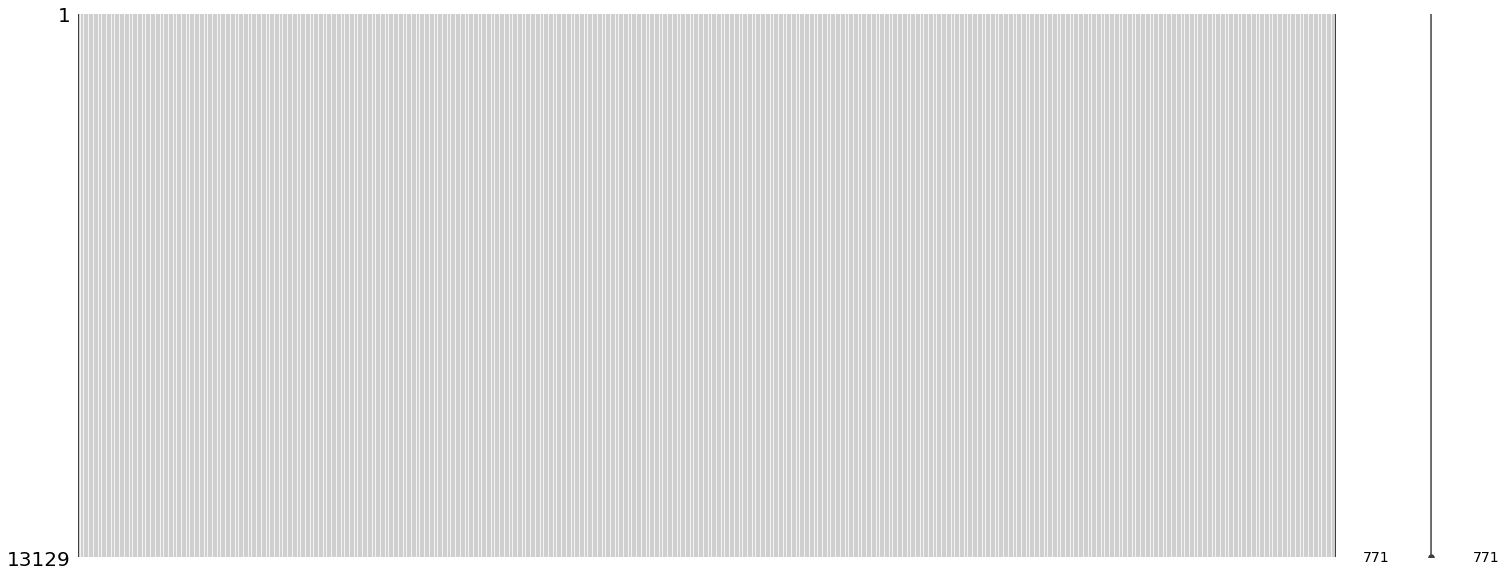

In [114]:
ms.matrix(final)

### Analysing Data

In [115]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [116]:
final.shape

(13129, 771)

In [117]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 771 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(15)
memory usage: 77.3+ MB


In [118]:
final.drop('track.8 genres', axis=1, inplace=True)

In [119]:
final.shape

(13129, 770)

In [120]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [121]:
final['track.7 genre_top'].value_counts()

Rock                                                       3892
Electronic                                                 2170
Avant-Garde|International|                                 1902
Avant-Garde|International|Blues|                           1507
Hip-Hop                                                     910
Folk                                                        874
Old-Time / Historic                                         357
Pop                                                         346
Avant-Garde|International|Blues|Jazz|                       269
Classical                                                   265
Jazz                                                        241
International                                               133
Instrumental                                                 84
Avant-Garde|International|Blues|Jazz|Classical|              82
Blues                                                        66
Experimental                            

In [122]:
final_length = len(final)

### Feature Engineering

In [123]:
def format_strings(x):
    if '-' in x:
        return ''.join(x.split('-'))
    if x.find('/'):
        return '|'.join(x.split('/'))
    return x

In [124]:
def modifyString(serie, val):
    for i in range(0, val):
        if serie[i] == 'Old-Time / Historic':
            serie[i] = 'OldTime|Historic'
    return serie

In [125]:
 modifyString(final['track.7 genre_top'], final_length)

<ipython-input-124-f80fc5e77e70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[i] = 'OldTime|Historic'


0                           Hip-Hop
1                           Hip-Hop
2                           Hip-Hop
3                               Pop
4                           Hip-Hop
                    ...            
13124    Avant-Garde|International|
13125    Avant-Garde|International|
13126    Avant-Garde|International|
13127    Avant-Garde|International|
13128    Avant-Garde|International|
Name: track.7 genre_top, Length: 13129, dtype: object

In [126]:
final['track.7 genre_top'] = modifyString(final['track.7 genre_top'], final_length)

In [127]:
final['track.7 genre_top'] = final['track.7 genre_top'].apply(format_strings)

In [128]:
final['track.7 genre_top'].value_counts()

Rock                                                      3892
Electronic                                                2170
AvantGarde|International|                                 1902
AvantGarde|International|Blues|                           1507
HipHop                                                     910
Folk                                                       874
OldTime|Historic                                           357
Pop                                                        346
AvantGarde|International|Blues|Jazz|                       269
Classical                                                  265
Jazz                                                       241
International                                              133
Instrumental                                                84
AvantGarde|International|Blues|Jazz|Classical|              82
Blues                                                       66
Experimental                                           

In [129]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [130]:
metadata = pd.DataFrame()

In [131]:
metadata['track_id'] = final['track_id']

In [132]:
metadata.shape

(13129, 1)

In [133]:
track_title.shape

(106574, 2)

In [134]:
track_title = track_title.set_index('track_id')

In [135]:
track_title.head()

track.19 title
track_id                 
2                    Food
3            Electric Ave
5              This World
10                Freeway
20        Spiritual Level

In [136]:
track_title.index = [int(i) for i in track_title.index]

In [137]:
track_title.head()

track.19 title
2              Food
3      Electric Ave
5        This World
10          Freeway
20  Spiritual Level

In [138]:
metadata.head()

track_id
0         2
1         3
2         5
3        10
4       134

In [139]:
metadata['album_title'] = final['album.10 title']

In [140]:
metadata['artist_name'] = final['artist.12 name']

In [141]:
metadata['genre'] = final['track.7 genre_top']

In [142]:
final['track.11 interest']

0         4656
1         1470
2         1933
3        54881
4         1126
         ...  
13124    20996
13125     4501
13126     3641
13127     3960
13128     7548
Name: track.11 interest, Length: 13129, dtype: object

In [143]:
metadata['track.11 interest'] = final['track.11 interest']
metadata['track.14 listens'] = final['track.14 listens']

In [144]:
metadata = metadata.set_index('track_id')

In [145]:
metadata.tail()

album_title      artist_name                      genre  \
track_id                                                                     
124857    Do You Know The Word            BASIC  AvantGarde|International|   
124862    Do You Know The Word            BASIC  AvantGarde|International|   
124863    Do You Know The Word            BASIC  AvantGarde|International|   
124864    Do You Know The Word            BASIC  AvantGarde|International|   
124911     Suicide Beauty Girl  Yusuke Tsutsumi  AvantGarde|International|   

         track.11 interest track.14 listens  
track_id                                     
124857               20996            13365  
124862                4501             3588  
124863                3641             2956  
124864                3960             3126  
124911                7548             6108

In [146]:
metadata.head()

album_title artist_name   genre track.11 interest  \
track_id                                                               
2         AWOL - A Way Of Life        AWOL  HipHop              4656   
3         AWOL - A Way Of Life        AWOL  HipHop              1470   
5         AWOL - A Way Of Life        AWOL  HipHop              1933   
10           Constant Hitmaker   Kurt Vile     Pop             54881   
134       AWOL - A Way Of Life        AWOL  HipHop              1126   

         track.14 listens  
track_id                   
2                    1293  
3                     514  
5                    1151  
10                  50135  
134                   943

In [147]:
metadata['track_title'] = track_title.loc[metadata.index]['track.19 title']

In [148]:
metadata.tail()

album_title      artist_name                      genre  \
track_id                                                                     
124857    Do You Know The Word            BASIC  AvantGarde|International|   
124862    Do You Know The Word            BASIC  AvantGarde|International|   
124863    Do You Know The Word            BASIC  AvantGarde|International|   
124864    Do You Know The Word            BASIC  AvantGarde|International|   
124911     Suicide Beauty Girl  Yusuke Tsutsumi  AvantGarde|International|   

         track.11 interest track.14 listens                   track_title  
track_id                                                                   
124857               20996            13365  I'm Wearing My Dancing Pants  
124862                4501             3588             Me Funky You Jane  
124863                3641             2956               Ain't Mad at Ya  
124864                3960             3126           This Is Not the End  
124911                7548             6108                        Heaven

In [149]:
metadata.head()

album_title artist_name   genre track.11 interest  \
track_id                                                               
2         AWOL - A Way Of Life        AWOL  HipHop              4656   
3         AWOL - A Way Of Life        AWOL  HipHop              1470   
5         AWOL - A Way Of Life        AWOL  HipHop              1933   
10           Constant Hitmaker   Kurt Vile     Pop             54881   
134       AWOL - A Way Of Life        AWOL  HipHop              1126   

         track.14 listens   track_title  
track_id                                 
2                    1293          Food  
3                     514  Electric Ave  
5                    1151    This World  
10                  50135       Freeway  
134                   943  Street Music

In [150]:
len(metadata[metadata['genre'].isnull()])

0

In [151]:
final.drop('album.10 title', axis=1, inplace=True)

In [152]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [153]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 769 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(13)
memory usage: 77.6+ MB


In [154]:
final.drop('artist.12 name', axis=1, inplace=True)

In [155]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 768 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(12)
memory usage: 77.5+ MB


In [156]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [157]:
k = final # Restore point # Removed Label Encoding

In [158]:
final.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  artist_discovery  artist_familiarity  \
0     0.159310  165.922  0.576661          0.388990            0.386740   
1     0.461818  126.957  0.269240          0.388990            0.386740   
2     0.124595  100.260  0.621661          0.388990            0.386740   
3     0.032985  111.562  0.963590          0.557339            0.614272   
4     0.525519  114.290  0.894072          0.388990            0.386740   

   artist_hotttnesss  song_currency  song_hotttnesss       000       001  \
0           0.406370       0.000000         0.000000  0.877233  0.588911   
1           0.406370       0.000000         0.000000  0.534429  0.537414   
2           0.406370       0.000000         0.000000  0.548093  0.720192   
3           0.798387       0.005158         0.354516  0.311404  0.711402   
4           0.406370       0.000000         0.000000  0.610849  0.569169   

        002       003       004       005       006       007       008  \
0  0.354243  0.295090  0.298413  0.309430  0.304496  0.334579  0.249495   
1  0.443299  0.390879  0.344573  0.366448  0.419455  0.747766  0.460901   
2  0.389257  0.344934  0.361300  0.402543  0.434044  0.388137  0.512487   
3  0.321914  0.500601  0.250963  0.321316  0.734250  0.325188  0.373012   
4  0.428494  0.345796  0.376920  0.460590  0.401371  0.449900  0.428946   

        009       010       011    012     013    014     015     016     017  \
0  0.259656  0.318376  0.371974  1.000  0.5710  0.278  0.2100  0.2150  0.2285   
1  0.392379  0.474559  0.406729  0.506  0.5145  0.387  0.3235  0.2805  0.3135   
2  0.525755  0.425371  0.446896  0.511  0.7720  0.361  0.2880  0.3310  0.3720   
3  0.235840  0.368756  0.440775  0.263  0.7360  0.273  0.4260  0.2140  0.2880   
4  0.446736  0.479849  0.378221  0.614  0.5450  0.363  0.2800  0.3110  0.3970   

      018    019     020     021    022     023       024       025       026  \
0  0.2375  0.279  0.1685  0.1685  0.279  0.3325  0.049848  0.104212  0.060230   
1  0.3455  0.898  0.4365  0.3385  0.398  0.3480  0.079207  0.083319  0.073595   
2  0.3590  0.279  0.4430  0.4840  0.368  0.3970  0.081051  0.078300  0.048697   
3  0.8100  0.246  0.2950  0.1640  0.311  0.3860  0.033969  0.070692  0.039161   
4  0.3170  0.404  0.3560  0.3800  0.420  0.2920  0.085176  0.092242  0.073183   

        027       028       029       030       031       032       033  \
0  0.052290  0.047403  0.052815  0.052733  0.062216  0.051613  0.057399   
1  0.071024  0.056679  0.066113  0.073889  0.088100  0.071305  0.059275   
2  0.056922  0.045264  0.066819  0.094489  0.089250  0.098089  0.084133   
3  0.095781  0.024102  0.028497  0.073847  0.045103  0.065468  0.041634   
4  0.056354  0.062012  0.088343  0.077084  0.097942  0.101790  0.094533   

        034       035    036    037    038    039    040    041    042    043  \
0  0.053199  0.062583  0.036  0.018  0.017  0.021  0.021  0.010  0.015  0.041   
1  0.088222  0.067298  0.040  0.040  0.029  0.021  0.009  0.020  0.020  0.053   
2  0.068866  0.086224  0.023  0.023  0.024  0.021  0.023  0.020  0.029  0.022   
3  0.041619  0.084442  0.027  0.081  0.035  0.025  0.033  0.008  0.099  0.038   
4  0.089367  0.088544  0.003  0.012  0.003  0.004  0.010  0.015  0.005  0.006   

     044    045    046    047  048  049  050  051  052  053  054  055  056  \
0  0.010  0.009  0.021  0.013  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  0.022  0.032  0.034  0.028  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  0.040  0

In [159]:
final.drop('set split', axis=1, inplace=True)

In [160]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 767 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(11)
memory usage: 77.4+ MB


In [161]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 767 entries, track_id to track.16 number
dtypes: float64(755), int32(1), object(11)
memory usage: 77.4+ MB


In [162]:
genres['title'].count()

163

In [163]:
genre_dummy = pd.DataFrame(data= np.zeros((13129, 163)), columns= list(genres['title'].unique()))

In [164]:
genre_dummy.head()

Avant-Garde  International  Blues  Jazz  Classical  Novelty  Comedy  \
0          0.0            0.0    0.0   0.0        0.0      0.0     0.0   
1          0.0            0.0    0.0   0.0        0.0      0.0     0.0   
2          0.0            0.0    0.0   0.0        0.0      0.0     0.0   
3          0.0            0.0    0.0   0.0        0.0      0.0     0.0   
4          0.0            0.0    0.0   0.0        0.0      0.0     0.0   

   Old-Time / Historic  Country  Pop  Disco  Rock  Easy Listening  Soul-RnB  \
0                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   
1                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   
2                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   
3                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   
4                  0.0      0.0  0.0    0.0   0.0             0.0       0.0   

   Electronic  Sound Effects  Folk  Soundtrack  Funk  Spoken  Hip-Hop  \
0         0.0            0.0   0.0         0.0   0.0     0.0      0.0   
1         0.0            0.0   0.0         0.0   0.0     0.0      0.0   
2         0.0            0.0   0.0         0.0   0.0     0.0      0.0   
3         0.0            0.0   0.0         0.0   0.0     0.0      0.0   
4         0.0            0.0   0.0         0.0   0.0     0.0      0.0   

   Audio Collage  Punk  Post-Rock  Lo-Fi  Field Recordings  Metal  Noise  \
0            0.0   0.0        0.0    0.0               0.0    0.0    0.0   
1            0.0   0.0        0.0    0.0               0.0    0.0    0.0   
2            0.0   0.0        0.0    0.0               0.0    0.0    0.0   
3            0.0   0.0        0.0    0.0               0.0    0.0    0.0   
4            0.0   0.0        0.0    0.0               0.0    0.0    0.0   

   Psych-Folk  Krautrock  Jazz: Vocal  Experimental  Electroacoustic  \
0         0.0        0.0          0.0           0.0              0.0   
1         0.0        0.0          0.0           0.0              0.0   
2         0.0        0.0          0.0           0.0              0.0   
3         0.0        0.0          0.0           0.0              0.0   
4         0.0        0.0          0.0           0.0              0.0   

   Ambient Electronic  Radio Art  Loud-Rock  Latin America  Drone  Free-Folk  \
0                 0.0        0.0        0.0            0.0    0.0        0.0   
1                 0.0        0.0        0.0            0.0    0.0        0.0   
2                 0.0        0.0        0.0            0.0    0.0        0.0   
3                 0.0        0.0        0.0            0.0    0.0        0.0   
4                 0.0        0.0        0.0            0.0    0.0        0.0   

   Noise-Rock  Psych-Rock  Bluegrass  Electro-Punk  Radio  Indie-Rock  \
0         0.0         0.0        0.0           0.0    0.0         0.0   
1         0.0         0.0        0.0           0.0    0.0         0.0   
2         0.0         0.0        0.0           0.0    0.0         0.0   
3         0.0         0.0        0.0           0.0    0.0         0.0   
4         0.0         0.0        0.0           0.0    0.0         0.0   

   Industrial  No Wave  Free-Jazz  Experimental Pop  French  Reggae - Dub  \
0         0.0      0.0        0.0               0.0     0.0           0.0   
1         0.0      0.0        0.0               0.0     0.0           0.0   
2         0.0      0.0        0.0               0.0     0.0           0.0   
3         0.0      0.0        0.0               0.0     0.0           0.0   
4         0.0      0.0        0.0               0.0     0.0           0.0   

   Afrobeat  Nerdcore  Garage  Indian  New Wave  Post-Punk  Sludge  African  \
0       0.0       0.0     0.0     0.0       0.0        0.0     0.0      0.0   
1       0.0       0.0     0.0     0.0       0.0        0.0     0.0      0.0   
2       0.0       0.0     0.0     0.0       0.0        0.0     0.0      0.0   
3       0.0       0.0     0.0     0.0       0.0        

In [165]:
genre_list = pd.Series(data= genre_dummy.columns)

In [166]:
genre_list = modifyString(genre_list, 163)

In [167]:
genre_list = genre_list.apply(format_strings)

In [168]:
genre_dummy.columns= genre_list

In [169]:
# columns converted successfully

In [170]:
genre_list = list(genre_list)

In [171]:
final

track_id  acousticness  danceability    energy  instrumentalness  \
0             2      0.416675      0.675894  0.634476          0.010628   
1             3      0.374408      0.528643  0.817461          0.001851   
2             5      0.043567      0.745566  0.701470          0.000697   
3            10      0.951670      0.658179  0.924525          0.965427   
4           134      0.452217      0.513238  0.560410          0.019443   
...         ...           ...           ...       ...               ...   
13124    124857      0.007592      0.790364  0.719288          0.853114   
13125    124862      0.041498      0.843077  0.536496          0.865151   
13126    124863      0.000124      0.609686  0.895136          0.846624   
13127    124864      0.327576      0.574426  0.548327          0.452867   
13128    124911      0.993606      0.499339  0.050622          0.945677   

       liveness  speechiness    tempo   valence  artist_discovery  \
0      0.177647     0.159310  165.922  0.576661          0.388990   
1      0.105880     0.461818  126.957  0.269240          0.388990   
2      0.373143     0.124595  100.260  0.621661          0.388990   
3      0.115474     0.032985  111.562  0.963590          0.557339   
4      0.096567     0.525519  114.290  0.894072          0.388990   
...         ...          ...      ...       ...               ...   
13124  0.720715     0.082550  141.332  0.890461          0.430808   
13125  0.547949     0.074001  101.975  0.476845          0.430808   
13126  0.632903     0.051517  129.996  0.496667          0.430808   
13127  0.075928     0.033388  142.009  0.569274          0.430808   
13128  0.095965     0.065189  119.965  0.204652          0.450229   

       artist_familiarity  artist_hotttnesss  song_currency  song_hotttnesss  \
0                0.386740           0.406370       0.000000         0.000000   
1                0.386740           0.406370       0.000000         0.000000   
2                0.386740           0.406370       0.000000         0.000000   
3                0.614272           0.798387       0.005158         0.354516   
4                0.386740           0.406370       0.000000         0.000000   
...                   ...                ...            ...              ...   
13124            0.456871           0.486749       0.000000         0.000000   
13125            0.456871           0.486749       0.000000         0.000000   
13126            0.456871           0.486749       0.000000         0.000000   
13127            0.456871           0.486749       0.000000         0.000000   
13128            0.274787           0.470345       0.000061         0.068649   

            000       001       002       003       004       005       006  \
0      0.877233  0.588911  0.354243  0.295090  0.298413  0.309430  0.304496   
1      0.534429  0.537414  0.443299  0.390879  0.344573  0.366448  0.419455   
2      0.548093  0.720192  0.389257  0.344934  0.361300  0.402543  0.434044   
3      0.311404  0.711402  0.321914  0.500601  0.250963  0.321316  0.734250   
4      0.610849  0.569169  0.428494  0.345796  0.376920  0.460590  0.401371   
...         ...       ...       ...       ...       ...       ...       ...   
13124  0.717013  0.686557  0.411056  0.342718  0.341934  0.482926  0.419219   
13125  0.673395  0.846995  0.447772  0.425936  0.407817  0.405924  0.290565   
13126  0.842368  0.719091  0.351503  0.354707  0.314619  0.276266  0.340571   
13127  0.346748  0.311817  0.220864  0.185269  0.333642  0.290699  0.558345   
13128  0.319693  0.164967  0.071792  0.426253  0.068991  0.226611  0.076166   

            007       008       009       010       011     012     013  \
0      0.334579  0.249495  0.259656  0.318376  0.371974  1.0000  0.5710   
1      0.747766  0.460901  0.392379  0.474559  0.406729  0.5060  0.5145   
2      0.388137  0.512487  0.525755  0.425371  0.446896  0.5110  0.7720   
3      0.325188  0.373012  0.235840  0.368756  0.440775  0.2630  0.

In [172]:
for i in range(0, final_length):
    if '|' in final['track.7 genre_top'][i]:
        divided_list = str(final['track.7 genre_top'][i]).split('|')
        count = len(divided_list)
        for j in range(0, count):
            if divided_list[j] in genre_list:
                location = genre_list.index(divided_list[j])
                genre_dummy.iloc[i, location] = 1
    else:
        location = genre_list.index(final['track.7 genre_top'][i])
        genre_dummy.iloc[i, location] = 1

In [173]:
genre_list.index(final['track.7 genre_top'][0])

20

In [174]:
final.drop(['track.7 genre_top'], axis= 1, inplace= True)

In [175]:
final = pd.concat([final, genre_dummy], axis= 1)

In [176]:
final

track_id  acousticness  danceability    energy  instrumentalness  \
0             2      0.416675      0.675894  0.634476          0.010628   
1             3      0.374408      0.528643  0.817461          0.001851   
2             5      0.043567      0.745566  0.701470          0.000697   
3            10      0.951670      0.658179  0.924525          0.965427   
4           134      0.452217      0.513238  0.560410          0.019443   
...         ...           ...           ...       ...               ...   
13124    124857      0.007592      0.790364  0.719288          0.853114   
13125    124862      0.041498      0.843077  0.536496          0.865151   
13126    124863      0.000124      0.609686  0.895136          0.846624   
13127    124864      0.327576      0.574426  0.548327          0.452867   
13128    124911      0.993606      0.499339  0.050622          0.945677   

       liveness  speechiness    tempo   valence  artist_discovery  \
0      0.177647     0.159310  165.922  0.576661          0.388990   
1      0.105880     0.461818  126.957  0.269240          0.388990   
2      0.373143     0.124595  100.260  0.621661          0.388990   
3      0.115474     0.032985  111.562  0.963590          0.557339   
4      0.096567     0.525519  114.290  0.894072          0.388990   
...         ...          ...      ...       ...               ...   
13124  0.720715     0.082550  141.332  0.890461          0.430808   
13125  0.547949     0.074001  101.975  0.476845          0.430808   
13126  0.632903     0.051517  129.996  0.496667          0.430808   
13127  0.075928     0.033388  142.009  0.569274          0.430808   
13128  0.095965     0.065189  119.965  0.204652          0.450229   

       artist_familiarity  artist_hotttnesss  song_currency  song_hotttnesss  \
0                0.386740           0.406370       0.000000         0.000000   
1                0.386740           0.406370       0.000000         0.000000   
2                0.386740           0.406370       0.000000         0.000000   
3                0.614272           0.798387       0.005158         0.354516   
4                0.386740           0.406370       0.000000         0.000000   
...                   ...                ...            ...              ...   
13124            0.456871           0.486749       0.000000         0.000000   
13125            0.456871           0.486749       0.000000         0.000000   
13126            0.456871           0.486749       0.000000         0.000000   
13127            0.456871           0.486749       0.000000         0.000000   
13128            0.274787           0.470345       0.000061         0.068649   

            000       001       002       003       004       005       006  \
0      0.877233  0.588911  0.354243  0.295090  0.298413  0.309430  0.304496   
1      0.534429  0.537414  0.443299  0.390879  0.344573  0.366448  0.419455   
2      0.548093  0.720192  0.389257  0.344934  0.361300  0.402543  0.434044   
3      0.311404  0.711402  0.321914  0.500601  0.250963  0.321316  0.734250   
4      0.610849  0.569169  0.428494  0.345796  0.376920  0.460590  0.401371   
...         ...       ...       ...       ...       ...       ...       ...   
13124  0.717013  0.686557  0.411056  0.342718  0.341934  0.482926  0.419219   
13125  0.673395  0.846995  0.447772  0.425936  0.407817  0.405924  0.290565   
13126  0.842368  0.719091  0.351503  0.354707  0.314619  0.276266  0.340571   
13127  0.346748  0.311817  0.220864  0.185269  0.333642  0.290699  0.558345   
13128  0.319693  0.164967  0.071792  0.426253  0.068991  0.226611  0.076166   

            007       008       009       010       011     012     013  \
0      0.334579  0.249495  0.259656  0.318376  0.371974  1.0000  0.5710   
1      0.747766  0.460901  0.392379  0.474559  0.406729  0.5060  0.5145   
2      0.388137  0.512487  0.525755  0.425371  0.446896  0.5110  0.7720   
3      0.325188  0.373012  0.235840  0.368756  0.440775  0.2630  0.

In [177]:
final[ (final['danceability'] < 0.4) 
                     & (final['acousticness']> 0.6) 
                     & (final['speechiness'] < 0.4) 
                     & (final['energy'] < 0.4) 
                     & (final['valence'] <0.5) ]

track_id  acousticness  danceability    energy  instrumentalness  \
14          154      0.970135      0.352946  0.023852          0.957113   
18          171      0.698278      0.285816  0.213494          0.955691   
29          191      0.982464      0.286557  0.238348          0.942937   
34          196      0.995459      0.370061  0.146734          0.972813   
38          200      0.960192      0.215926  0.295126          0.802978   
...         ...           ...           ...       ...               ...   
12946    121258      0.974037      0.294501  0.015296          0.501205   
13031    123682      0.989292      0.305680  0.092909          0.000003   
13038    123821      0.737893      0.372404  0.329644          0.919781   
13089    124530      0.948106      0.118568  0.206145          0.974500   
13106    124796      0.987265      0.153698  0.238490          0.812966   

       liveness  speechiness    tempo   valence  artist_discovery  \
14     0.113261     0.032177   53.758  0.035632          0.262717   
18     0.087036     0.064094  125.645  0.150599          0.275672   
29     0.097493     0.029908  115.292  0.086137          0.423999   
34     0.117828     0.035720  107.346  0.136060          0.423999   
38     0.170076     0.037825  200.391  0.367740          0.423999   
...         ...          ...      ...       ...               ...   
12946  0.102911     0.037753  117.965  0.101170          0.363839   
13031  0.140379     0.054193   74.113  0.162841          0.391072   
13038  0.104495     0.031262  111.243  0.037006          0.394235   
13089  0.145151     0.048082   62.581  0.031483          0.386137   
13106  0.184972     0.041547   79.255  0.057326          0.450229   

       artist_familiarity  artist_hotttnesss  song_currency  song_hotttnesss  \
14               0.173315           0.274455       0.000500         0.070213   
18               0.162622           0.287989       0.000250         0.039431   
29               0.403155           0.444855       0.000000         0.000000   
34               0.403155           0.444855       0.000000         0.000000   
38               0.403155           0.444855       0.000042         0.063842   
...                   ...                ...            ...              ...   
12946            0.273516           0.380095       0.000000         0.000000   
13031            0.541628           0.499418       0.000000         0.000000   
13038            0.174907           0.411849       0.001852         0.191947   
13089            0.323725           0.403390       0.000000         0.035322   
13106            0.274787           0.470345       0.000029         0.068649   

            000       001       002       003       004       005       006  \
14     0.031421  0.207779  0.692911  0.449628  0.066343  0.086677  0.367156   
18     0.925440  0.243155  0.286845  0.248707  0.259810  0.181983  0.337328   
29     0.352904  0.492753  0.192396  0.293118  0.409915  0.543556  0.442651   
34     0.431973  0.523900  0.172998  0.213432  0.305975  0.570108  0.342055   
38     0.360866  0.280334  0.533534  0.165161  0.510435  0.188950  0.220966   
...         ...       ...       ...       ...       ...       ...       ...   
12946  0.124046  0.391646  0.366007  0.078933  0.228456  0.075793  0.233137   
13031  0.485514  0.361871  0.300734  0.226334  0.298920  0.219215  0.280869   
13038  0.210287  0.497497  0.618862  0.248388  0.394427  0.283845  0.413724   
13089  0.379958  0.500732  0.190283  0.405417  0.164755  0.365115  0.104063   
13106  0.335373  0.140316  0.314196  0.428947  0.146769  0.608293  0.131233   

            007       008       009       010       011     012     013  \
14     0.641302  0.208542  0.089818  0.082534  0.029495  0.0140  0.1400   
18     0.546604  0.179983  0.261716  0.246612  0.589483  1.0000  0.1950   
29     0.282173  0.384926  0.334737  0.489156  0.278783  0.3060  0.4590   
34     0.264335  0.324231  0.184642  0.197552  0.119818  0.4150  0.

In [178]:
final_write = final[ (final['danceability'] < 0.4) 
                     & (final['acousticness']> 0.6) 
                     & (final['speechiness'] < 0.4) 
                     & (final['energy'] < 0.4) 
                     & (final['valence'] <0.5) ]

### Writing final data to .csv files

In [180]:
import os

if not os.path.isdir(os.path.join('datasets','final')):
    os.makedirs(os.path.join('datasets','final'))
    
metadata.to_csv('datasets/final/metadata.csv')
final_write.to_csv('datasets/final/final.csv')

In [181]:
## clustering song with k-means

In [182]:
final_write

track_id  acousticness  danceability    energy  instrumentalness  \
14          154      0.970135      0.352946  0.023852          0.957113   
18          171      0.698278      0.285816  0.213494          0.955691   
29          191      0.982464      0.286557  0.238348          0.942937   
34          196      0.995459      0.370061  0.146734          0.972813   
38          200      0.960192      0.215926  0.295126          0.802978   
...         ...           ...           ...       ...               ...   
12946    121258      0.974037      0.294501  0.015296          0.501205   
13031    123682      0.989292      0.305680  0.092909          0.000003   
13038    123821      0.737893      0.372404  0.329644          0.919781   
13089    124530      0.948106      0.118568  0.206145          0.974500   
13106    124796      0.987265      0.153698  0.238490          0.812966   

       liveness  speechiness    tempo   valence  artist_discovery  \
14     0.113261     0.032177   53.758  0.035632          0.262717   
18     0.087036     0.064094  125.645  0.150599          0.275672   
29     0.097493     0.029908  115.292  0.086137          0.423999   
34     0.117828     0.035720  107.346  0.136060          0.423999   
38     0.170076     0.037825  200.391  0.367740          0.423999   
...         ...          ...      ...       ...               ...   
12946  0.102911     0.037753  117.965  0.101170          0.363839   
13031  0.140379     0.054193   74.113  0.162841          0.391072   
13038  0.104495     0.031262  111.243  0.037006          0.394235   
13089  0.145151     0.048082   62.581  0.031483          0.386137   
13106  0.184972     0.041547   79.255  0.057326          0.450229   

       artist_familiarity  artist_hotttnesss  song_currency  song_hotttnesss  \
14               0.173315           0.274455       0.000500         0.070213   
18               0.162622           0.287989       0.000250         0.039431   
29               0.403155           0.444855       0.000000         0.000000   
34               0.403155           0.444855       0.000000         0.000000   
38               0.403155           0.444855       0.000042         0.063842   
...                   ...                ...            ...              ...   
12946            0.273516           0.380095       0.000000         0.000000   
13031            0.541628           0.499418       0.000000         0.000000   
13038            0.174907           0.411849       0.001852         0.191947   
13089            0.323725           0.403390       0.000000         0.035322   
13106            0.274787           0.470345       0.000029         0.068649   

            000       001       002       003       004       005       006  \
14     0.031421  0.207779  0.692911  0.449628  0.066343  0.086677  0.367156   
18     0.925440  0.243155  0.286845  0.248707  0.259810  0.181983  0.337328   
29     0.352904  0.492753  0.192396  0.293118  0.409915  0.543556  0.442651   
34     0.431973  0.523900  0.172998  0.213432  0.305975  0.570108  0.342055   
38     0.360866  0.280334  0.533534  0.165161  0.510435  0.188950  0.220966   
...         ...       ...       ...       ...       ...       ...       ...   
12946  0.124046  0.391646  0.366007  0.078933  0.228456  0.075793  0.233137   
13031  0.485514  0.361871  0.300734  0.226334  0.298920  0.219215  0.280869   
13038  0.210287  0.497497  0.618862  0.248388  0.394427  0.283845  0.413724   
13089  0.379958  0.500732  0.190283  0.405417  0.164755  0.365115  0.104063   
13106  0.335373  0.140316  0.314196  0.428947  0.146769  0.608293  0.131233   

            007       008       009       010       011     012     013  \
14     0.641302  0.208542  0.089818  0.082534  0.029495  0.0140  0.1400   
18     0.546604  0.179983  0.261716  0.246612  0.589483  1.0000  0.1950   
29     0.282173  0.384926  0.334737  0.489156  0.278783  0.3060  0.4590   
34     0.264335  0.324231  0.184642  0.197552  0.119818  0.4150  0.

In [183]:
final_write[["energy","instrumentalness","liveness","speechiness","tempo","valence","artist_discovery","artist_familiarity","artist_hotttnesss","song_currency","song_hotttnesss"]]

energy  instrumentalness  liveness  speechiness    tempo   valence  \
14     0.023852          0.957113  0.113261     0.032177   53.758  0.035632   
18     0.213494          0.955691  0.087036     0.064094  125.645  0.150599   
29     0.238348          0.942937  0.097493     0.029908  115.292  0.086137   
34     0.146734          0.972813  0.117828     0.035720  107.346  0.136060   
38     0.295126          0.802978  0.170076     0.037825  200.391  0.367740   
...         ...               ...       ...          ...      ...       ...   
12946  0.015296          0.501205  0.102911     0.037753  117.965  0.101170   
13031  0.092909          0.000003  0.140379     0.054193   74.113  0.162841   
13038  0.329644          0.919781  0.104495     0.031262  111.243  0.037006   
13089  0.206145          0.974500  0.145151     0.048082   62.581  0.031483   
13106  0.238490          0.812966  0.184972     0.041547   79.255  0.057326   

       artist_discovery  artist_familiarity  artist_hotttnesss  song_currency  \
14             0.262717            0.173315           0.274455       0.000500   
18             0.275672            0.162622           0.287989       0.000250   
29             0.423999            0.403155           0.444855       0.000000   
34             0.423999            0.403155           0.444855       0.000000   
38             0.423999            0.403155           0.444855       0.000042   
...                 ...                 ...                ...            ...   
12946          0.363839            0.273516           0.380095       0.000000   
13031          0.391072            0.541628           0.499418       0.000000   
13038          0.394235            0.174907           0.411849       0.001852   
13089          0.386137            0.323725           0.403390       0.000000   
13106          0.450229            0.274787           0.470345       0.000029   

       song_hotttnesss  
14            0.070213  
18            0.039431  
29            0.000000  
34            0.000000  
38            0.063842  
...                ...  
12946         0.000000  
13031         0.000000  
13038         0.191947  
13089         0.035322  
13106         0.068649  

[1195 rows x 11 columns]

In [184]:
X = final_write[["energy","instrumentalness","liveness","speechiness","tempo","valence","artist_discovery","artist_familiarity","artist_hotttnesss","song_currency","song_hotttnesss"]]

In [185]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [186]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [187]:
scaled_features

array([[-1.08379927,  0.68295449, -0.50175793, ..., -0.46069072,
         0.15972629,  0.66625397],
       [ 0.56291961,  0.67866708, -0.63826427, ..., -0.36335483,
         0.01688046,  0.15515671],
       [ 0.77873602,  0.64020051, -0.58383156, ...,  0.76481809,
        -0.12596538, -0.49954657],
       ...,
       [ 1.5714905 ,  0.57036387, -0.54738767, ...,  0.52744048,
         0.93225985,  2.68749739],
       [ 0.49910529,  0.73539249, -0.33576362, ...,  0.46660375,
        -0.12596538,  0.08693181],
       [ 0.77997204,  0.24821624, -0.12848526, ...,  0.94814097,
        -0.10915996,  0.64028568]])

In [188]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [189]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [190]:
# The lowest SSE value
kmeans.inertia_


9719.943869765764

In [191]:
# Final locations of the centroid
kmeans.cluster_centers_


array([[-2.02333532e-01, -3.08536579e-03,  5.39309401e-02,
         1.19677400e-01, -1.24762890e-01, -1.82713503e-02,
        -7.54948475e-01, -7.20448115e-01, -7.48262164e-01,
        -6.50700772e-02, -2.49696292e-01],
       [ 2.80876992e-01, -3.10789681e-01,  2.78514748e-01,
        -2.25882900e-01,  3.49506342e-01, -1.21873439e-01,
         1.22368057e+00,  1.58771044e+00,  1.62384387e+00,
         1.29997496e+00,  3.24226471e+00],
       [ 2.28233413e-01,  4.91430280e-02, -1.12049060e-01,
        -1.26337656e-01,  1.15180810e-01,  4.19489599e-02,
         8.26126876e-01,  7.27511302e-01,  7.59244800e-01,
        -1.01911507e-01, -1.37998987e-01]])

In [192]:


# The number of iterations required to converge
kmeans.n_iter_

9

In [193]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [194]:
sse

[13145.0,
 10629.339935425449,
 9719.943869765764,
 9034.23866275957,
 8387.551546452163,
 7648.574634819396,
 7147.44371448464,
 6629.614918386274,
 6284.438607678438,
 5877.17935803995]

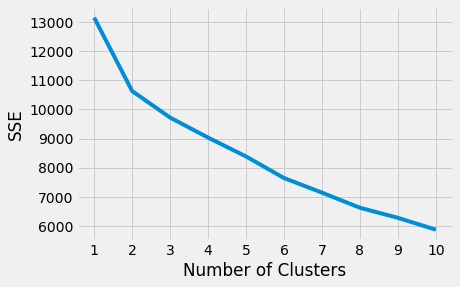

In [195]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [196]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [197]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

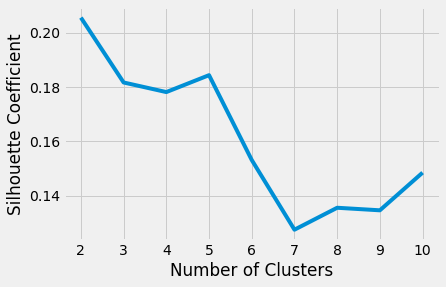

In [199]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [200]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [201]:
X

energy  instrumentalness  liveness  speechiness    tempo   valence  \
14     0.023852          0.957113  0.113261     0.032177   53.758  0.035632   
18     0.213494          0.955691  0.087036     0.064094  125.645  0.150599   
29     0.238348          0.942937  0.097493     0.029908  115.292  0.086137   
34     0.146734          0.972813  0.117828     0.035720  107.346  0.136060   
38     0.295126          0.802978  0.170076     0.037825  200.391  0.367740   
...         ...               ...       ...          ...      ...       ...   
12946  0.015296          0.501205  0.102911     0.037753  117.965  0.101170   
13031  0.092909          0.000003  0.140379     0.054193   74.113  0.162841   
13038  0.329644          0.919781  0.104495     0.031262  111.243  0.037006   
13089  0.206145          0.974500  0.145151     0.048082   62.581  0.031483   
13106  0.238490          0.812966  0.184972     0.041547   79.255  0.057326   

       artist_discovery  artist_familiarity  artist_hotttnesss  song_currency  \
14             0.262717            0.173315           0.274455       0.000500   
18             0.275672            0.162622           0.287989       0.000250   
29             0.423999            0.403155           0.444855       0.000000   
34             0.423999            0.403155           0.444855       0.000000   
38             0.423999            0.403155           0.444855       0.000042   
...                 ...                 ...                ...            ...   
12946          0.363839            0.273516           0.380095       0.000000   
13031          0.391072            0.541628           0.499418       0.000000   
13038          0.394235            0.174907           0.411849       0.001852   
13089          0.386137            0.323725           0.403390       0.000000   
13106          0.450229            0.274787           0.470345       0.000029   

       song_hotttnesss  
14            0.070213  
18            0.039431  
29            0.000000  
34            0.000000  
38            0.063842  
...                ...  
12946         0.000000  
13031         0.000000  
13038         0.191947  
13089         0.035322  
13106         0.068649  

[1195 rows x 11 columns]

In [202]:
pca = PCA(2)
 
#Transform the data
xdf = pca.fit_transform(X)
 
xdf.shape

(1195, 2)

In [203]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(xdf)

In [204]:
label

array([4, 2, 2, ..., 2, 4, 1])

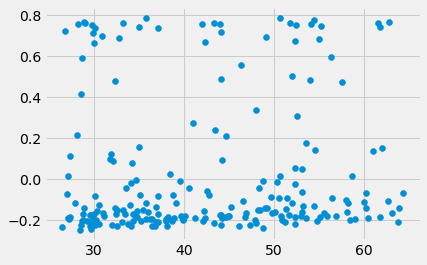

In [205]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = xdf[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

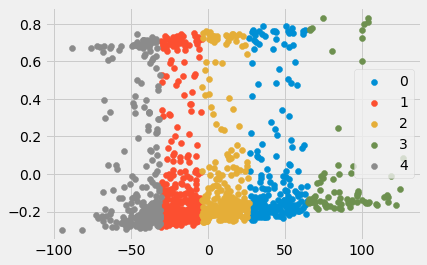

In [206]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(xdf[label == i , 0] , xdf[label == i , 1] , label = i)
plt.legend()
plt.show()

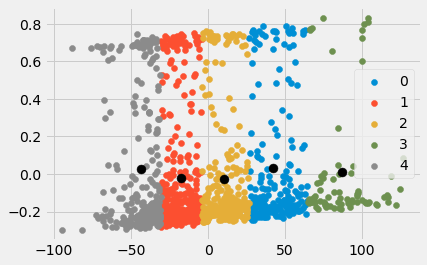

In [207]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(xdf[label == i , 0] , xdf[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()